### Import Necessary Libraries

In [877]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
%matplotlib inline 

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, LabelEncoder 
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load dataset

In [878]:

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_data = pd.read_csv('adult.data', header=None, names=column_names, na_values=' ?', skipinitialspace=True)

train_data.shape


(32561, 15)

In [879]:
train_data.head().T

0                   1                  2  \
age                        39                  50                 38   
workclass           State-gov    Self-emp-not-inc            Private   
fnlwgt                  77516               83311             215646   
education           Bachelors           Bachelors            HS-grad   
education-num              13                  13                  9   
marital-status  Never-married  Married-civ-spouse           Divorced   
occupation       Adm-clerical     Exec-managerial  Handlers-cleaners   
relationship    Not-in-family             Husband      Not-in-family   
race                    White               White              White   
sex                      Male                Male               Male   
capital-gain             2174                   0                  0   
capital-loss                0                   0                  0   
hours-per-week             40                  13                 40   
native-country  United-States       United-States      United-States   
income                  <=50K               <=50K              <=50K   

                                 3                   4  
age                             53                  28  
workclass                  Private             Private  
fnlwgt                      234721              338409  
education                     11th           Bachelors  
education-num                    7                  13  
marital-status  Married-civ-spouse  Married-civ-spouse  
occupation       Handlers-cleaners      Prof-specialty  
relationship               Husband                Wife  
race                         Black               Black  
sex                           Male              Female  
capital-gain                     0                   0  
capital-loss                     0                   0  
hours-per-week                  40                  40  
native-country       United-States                Cuba  
income                       <=50K               <=50K

In [880]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [881]:
train_data.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num   32561.0      10.080679       2.572720      1.0       9.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education-num       10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0

In [882]:
train_data.describe(include= 'object').T

count unique                 top   freq
workclass       32561      9             Private  22696
education       32561     16             HS-grad  10501
marital-status  32561      7  Married-civ-spouse  14976
occupation      32561     15      Prof-specialty   4140
relationship    32561      6             Husband  13193
race            32561      5               White  27816
sex             32561      2                Male  21790
native-country  32561     42       United-States  29170
income          32561      2               <=50K  24720

### Summary of Train Dataset

In [883]:


def summary(data_input, pred=None):
    obs = data_input.shape[0]
    Types = data_input.dtypes
    Counts = data_input.apply(lambda x: x.count())
    Min = data_input.min()
    Max = data_input.max()
    Uniques = data_input.apply(lambda x: x.unique().shape[0])
    Nulls = data_input.apply(lambda x: x.isnull().sum())
    print('Data shape:', data_input.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(train_data)

Data shape: (32561, 15)
___________________________
Data Types:
Types
object    9
int64     6
Name: count, dtype: int64
___________________________


Types  Counts  Uniques  Nulls                 Min  \
age              int64   32561       73      0                  17   
capital-gain     int64   32561      119      0                   0   
capital-loss     int64   32561       92      0                   0   
education       object   32561       16      0                10th   
education-num    int64   32561       16      0                   1   
fnlwgt           int64   32561    21648      0               12285   
hours-per-week   int64   32561       94      0                   1   
income          object   32561        2      0               <=50K   
marital-status  object   32561        7      0            Divorced   
native-country  object   32561       42      0                   ?   
occupation      object   32561       15      0                   ?   
race            object   32561        5      0  Amer-Indian-Eskimo   
relationship    object   32561        6      0             Husband   
sex             object   32561        2      0              Female   
workclass       object   32561        9      0                   ?   

                             Max  
age                           90  
capital-gain               99999  
capital-loss                4356  
education           Some-college  
education-num                 16  
fnlwgt                   1484705  
hours-per-week                99  
income                      >50K  
marital-status           Widowed  
native-country        Yugoslavia  
occupation      Transport-moving  
race                       White  
relationship                Wife  
sex                         Male  
workclass            Without-pay

In [884]:
# Checks duplicates and drops them

def duplicate_values(data_input):
    print("Duplicate check...")
    num_duplicates = data_input.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        data_input.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(train_data)

Duplicate check...
There are 24 duplicated observations in the dataset.
24 duplicates were dropped!
No more duplicate rows!


In [885]:
# Observe first the unique values

def get_unique_values(data_input):
    
    output_data = []

    for col in data_input.columns:

        # If the number of unique values in the column is less than or equal to 5
        if data_input.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = data_input.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, data_input.loc[:, col].nunique(), unique_values, data_input.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, data_input.loc[:, col].nunique(),"-", data_input.loc[:, col].dtype])

    output_d = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_d

get_unique_values(train_data)

Column Name  Number of Unique Values  \
0              age                       73   
1        workclass                        9   
2           fnlwgt                    21648   
3        education                       16   
4    education-num                       16   
5   marital-status                        7   
6       occupation                       15   
7     relationship                        6   
8             race                        5   
9              sex                        2   
10    capital-gain                      119   
11    capital-loss                       92   
12  hours-per-week                       94   
13  native-country                       42   
14          income                        2   

                                       Unique Values  Data Type  
0                                                   -     int64  
1   [State-gov, Self-emp-not-inc, Private, Federal...    object  
2                                                   -     int64  
3                                                   -    object  
4                                                   -     int64  
5   [Never-married, Married-civ-spouse, Divorced, ...    object  
6                                                   -    object  
7   [Not-in-family, Husband, Wife, Own-child, Unma...    object  
8   [White, Black, Asian-Pac-Islander, Amer-Indian...    object  
9                                      [Male, Female]    object  
10                                                  -     int64  
11                                                  -     int64  
12                                                  -     int64  
13                                                  -    object  
14                                      [<=50K, >50K]    object

In [886]:
# Missing Values
def missing_values(data_input):

    missing_count = data_input.isnull().sum()
    value_count = data_input.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_td = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_td

missing_values(train_data)


count  percentage
age                 0         0.0
workclass           0         0.0
fnlwgt              0         0.0
education           0         0.0
education-num       0         0.0
marital-status      0         0.0
occupation          0         0.0
relationship        0         0.0
race                0         0.0
sex                 0         0.0
capital-gain        0         0.0
capital-loss        0         0.0
hours-per-week      0         0.0
native-country      0         0.0
income              0         0.0

In [887]:
# As observed, the workclass and occupation features contain "?" values.
# Replace the values with nan

train_data[train_data == '?'] = np.nan
missing_values(train_data)

count  percentage
age                 0        0.00
workclass        1836        5.64
fnlwgt              0        0.00
education           0        0.00
education-num       0        0.00
marital-status      0        0.00
occupation       1843        5.66
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital-gain        0        0.00
capital-loss        0        0.00
hours-per-week      0        0.00
native-country    582        1.79
income              0        0.00

In [888]:
#Handle Missing Values on the workclass Column

train_data['workclass'].value_counts(normalize=True)

workclass
Private             0.738510
Self-emp-not-inc    0.082733
Local-gov           0.068174
State-gov           0.042279
Self-emp-inc        0.036351
Federal-gov         0.031269
Without-pay         0.000456
Never-worked        0.000228
Name: proportion, dtype: float64

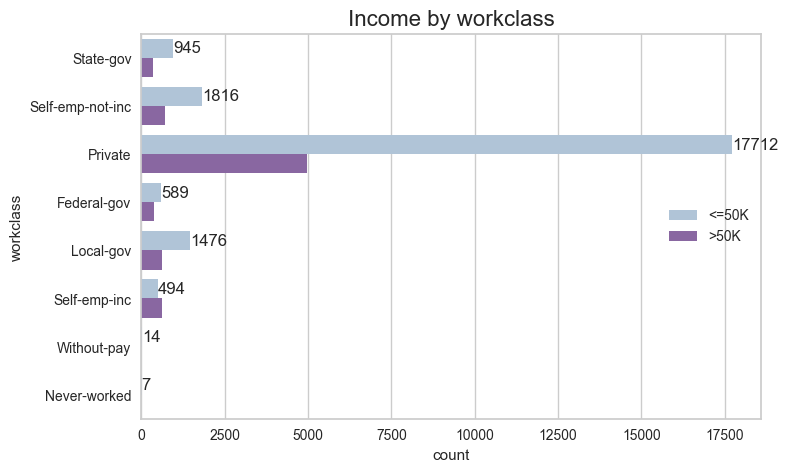

In [889]:
plt.figure(figsize = (8,5))
ax = sns.countplot(y = train_data['workclass'], hue = train_data['income'] , palette='BuPu')
plt.title("Income by workclass", fontsize = 16)
ax.bar_label(ax.containers[0]);
ax.legend(loc='center right')

In [890]:
train_data['workclass'] = train_data['workclass'].fillna('Private')

##Check missing values
missing_values(train_data)

count  percentage
age                 0        0.00
workclass           0        0.00
fnlwgt              0        0.00
education           0        0.00
education-num       0        0.00
marital-status      0        0.00
occupation       1843        5.66
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital-gain        0        0.00
capital-loss        0        0.00
hours-per-week      0        0.00
native-country    582        1.79
income              0        0.00

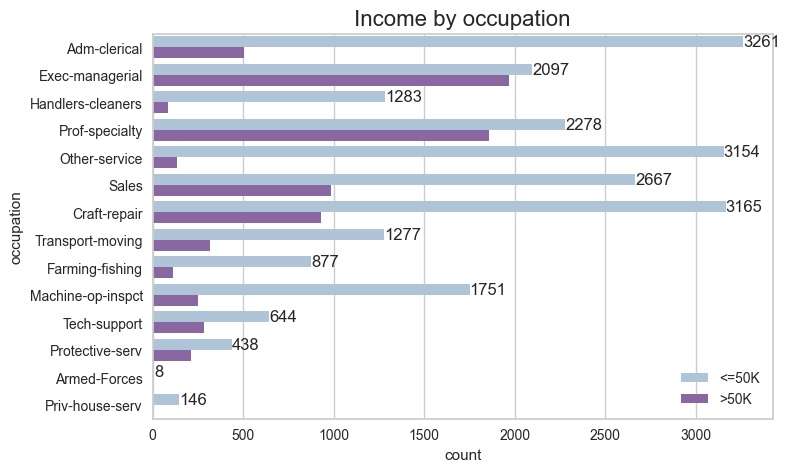

In [891]:
#Handle Missing Values on the occupation Column
train_data['occupation'].value_counts(normalize=True)
plt.figure(figsize = (8,5))
ax = sns.countplot(y = train_data['occupation'], hue = train_data['income'], palette='BuPu')
plt.title("Income by occupation", fontsize = 16)
ax.bar_label(ax.containers[0])
ax.legend(loc='lower right')
plt.show()

In [892]:
train_data['occupation'] = train_data['occupation'].fillna(train_data['occupation'].mode()[0])

#Check missing values
missing_values(train_data)

count  percentage
age                 0        0.00
workclass           0        0.00
fnlwgt              0        0.00
education           0        0.00
education-num       0        0.00
marital-status      0        0.00
occupation          0        0.00
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital-gain        0        0.00
capital-loss        0        0.00
hours-per-week      0        0.00
native-country    582        1.79
income              0        0.00

In [893]:
#Handle Missing Values on the native country Column

train_data['native-country'].value_counts(normalize=True)


native-country
United-States                 0.912314
Mexico                        0.019997
Philippines                   0.006196
Germany                       0.004287
Canada                        0.003787
Puerto-Rico                   0.003568
El-Salvador                   0.003317
India                         0.003129
Cuba                          0.002973
England                       0.002816
Jamaica                       0.002535
South                         0.002504
China                         0.002347
Italy                         0.002284
Dominican-Republic            0.002191
Vietnam                       0.002097
Japan                         0.001940
Guatemala                     0.001940
Poland                        0.001878
Columbia                      0.001846
Taiwan                        0.001596
Haiti                         0.001377
Iran                          0.001346
Portugal                      0.001158
Nicaragua                     0.001064
Peru      

In [894]:

train_data['native-country'].mode()[0]

# Filling any missing values (NaN) in the native.country column with "United-States" which is the mode.
train_data['native-country'] = train_data['native-country'].fillna('United-States')

#Check missing values
missing_values(train_data)

count  percentage
age                 0         0.0
workclass           0         0.0
fnlwgt              0         0.0
education           0         0.0
education-num       0         0.0
marital-status      0         0.0
occupation          0         0.0
relationship        0         0.0
race                0         0.0
sex                 0         0.0
capital-gain        0         0.0
capital-loss        0         0.0
hours-per-week      0         0.0
native-country      0         0.0
income              0         0.0

### Cleaning and Preparing Each Column - Train Dataset

In [895]:
# Function for counting and normalizing values in the column

def value_cnt_fonc(data_input, column_name):
    vc = data_input[column_name].value_counts()
    vc_norm = data_input[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='norm_counts')

    data_input_result = pd.concat([vc[column_name], vc['counts'], vc_norm['norm_counts']], axis=1)
    
    return data_input_result

# Categorcal and Numerecal Features

cat_features = train_data.select_dtypes(include='object').columns
num_features = train_data.select_dtypes(include=['int64','float64']).columns

print('Categoricals:', list(cat_features))
print('---------------------------')
print('Numericals:',list(num_features))



Categoricals: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
---------------------------
Numericals: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [896]:
# Target Feature income
value_cnt_fonc(train_data, 'income')

income  counts  norm_counts
0  <=50K   24698     0.759074
1   >50K    7839     0.240926

In [897]:
# Convert income values to binary: 0 for <=50K, 1 for >50K

train_data['income'] = train_data['income'].map({'<=50K': 0, '>50K': 1})

In [898]:
train_data.sample(5)

age  workclass  fnlwgt     education  education-num  \
14198   61    Private  273803       HS-grad              9   
24698   32    Private  223212     Preschool              1   
25758   58    Private  225394       HS-grad              9   
3770    40  State-gov  119578     Bachelors             13   
3491    33    Private  323619  Some-college             10   

           marital-status         occupation relationship   race     sex  \
14198  Married-civ-spouse       Craft-repair      Husband  White    Male   
24698  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
25758  Married-civ-spouse       Craft-repair      Husband  White    Male   
3770        Never-married     Prof-specialty    Unmarried  White  Female   
3491        Never-married       Adm-clerical    Unmarried  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  income  
14198             0             0              40  United-States       0  
24698             0             0              40         Mexico       0  
25758             0          1902              40  United-States       0  
3770              0             0              20  United-States       0  
3491              0             0              40  United-States       0

In [899]:
income_less_50K = train_data[train_data['income'] == 0].shape[0]
income_over_50K = train_data[train_data['income'] == 1].shape[0]

print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

Income <= 50K (0) count: 24698
Income >  50K (1) count: 7839


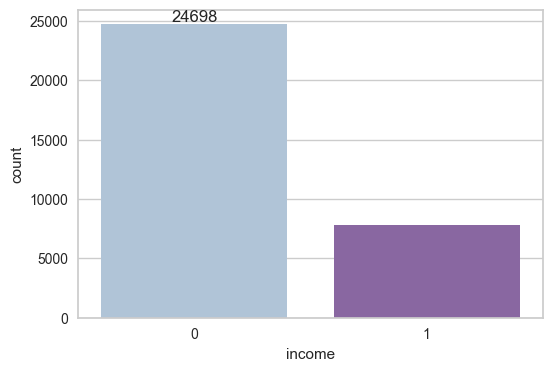

In [900]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=train_data, x="income", palette='BuPu')

ax.bar_label(ax.containers[0])
plt.show()

In [901]:
## Categorical Features
list(cat_features)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

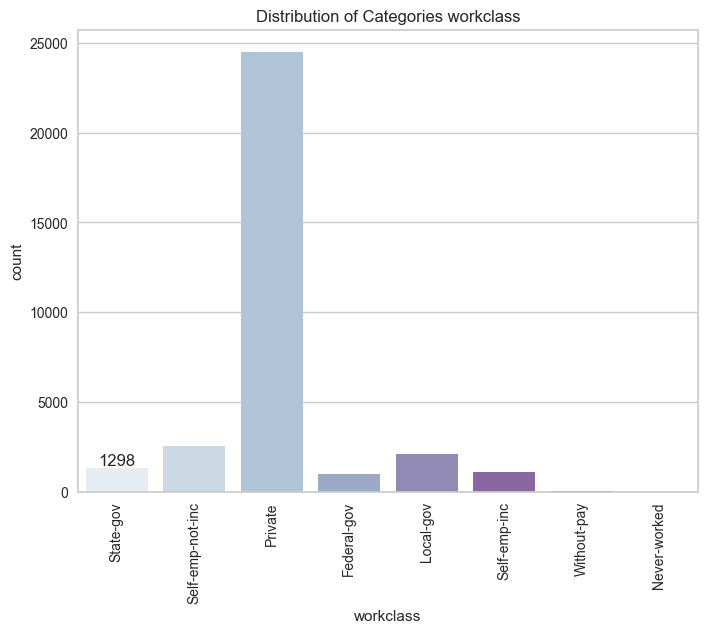

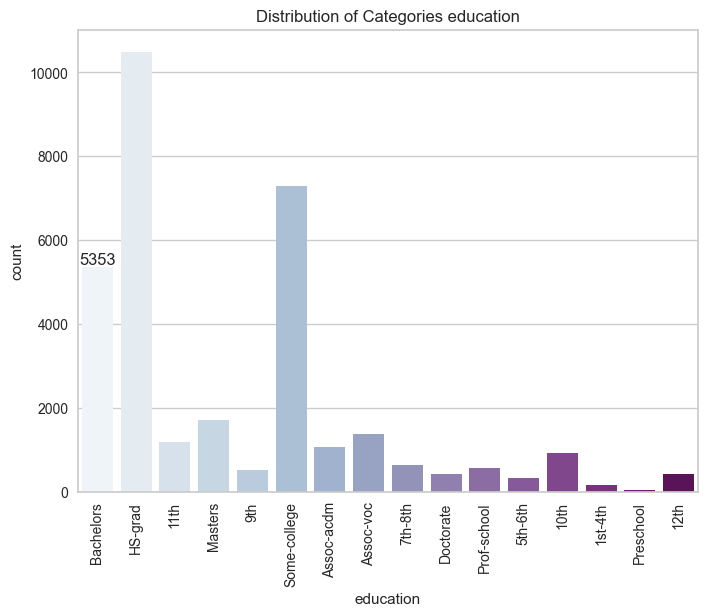

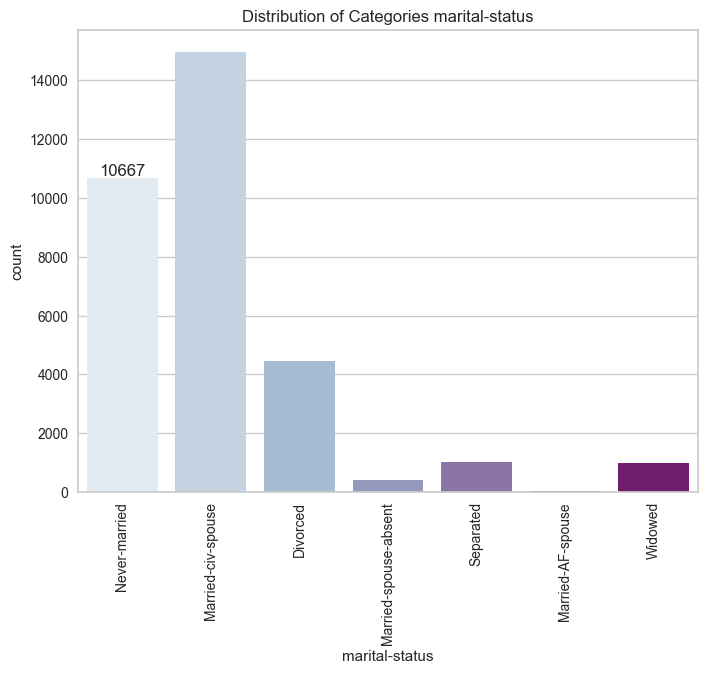

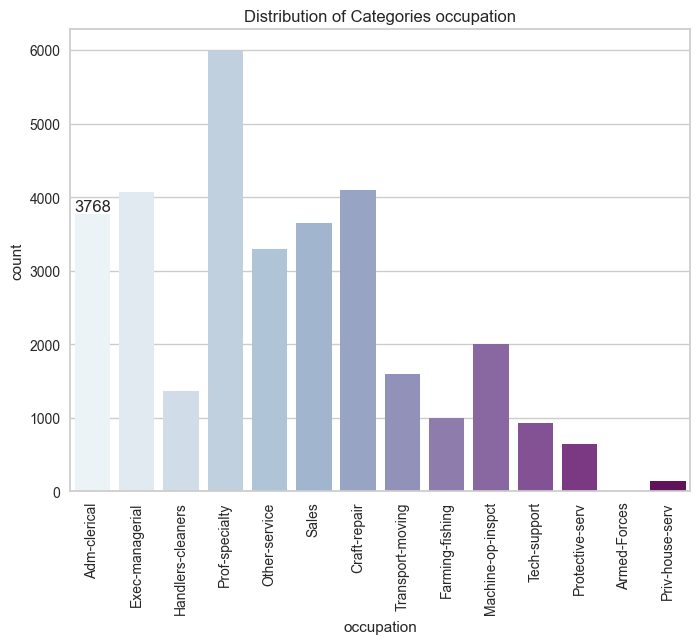

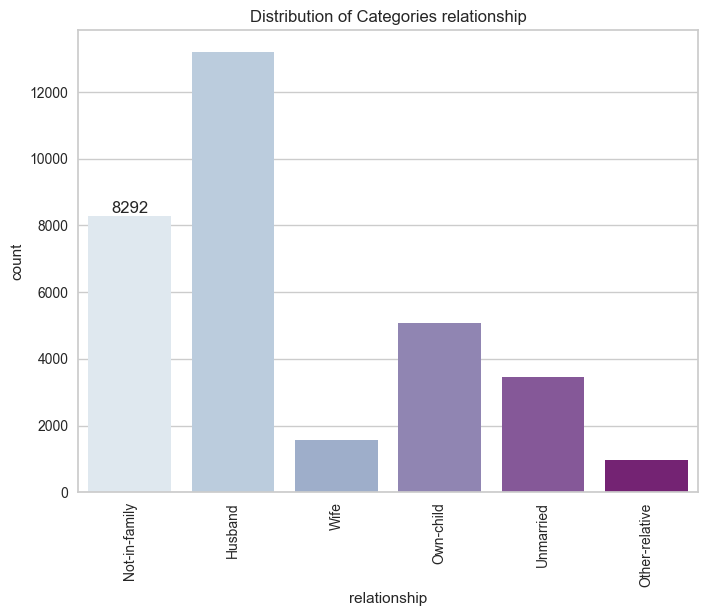

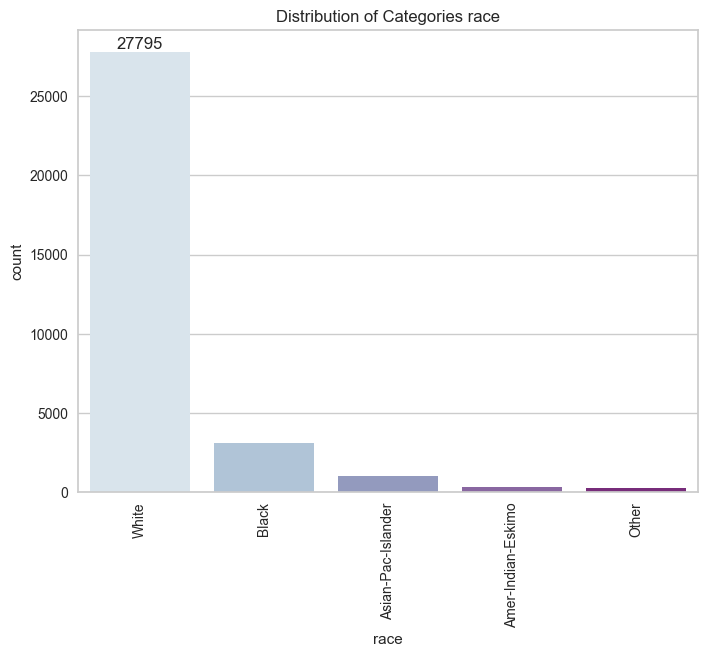

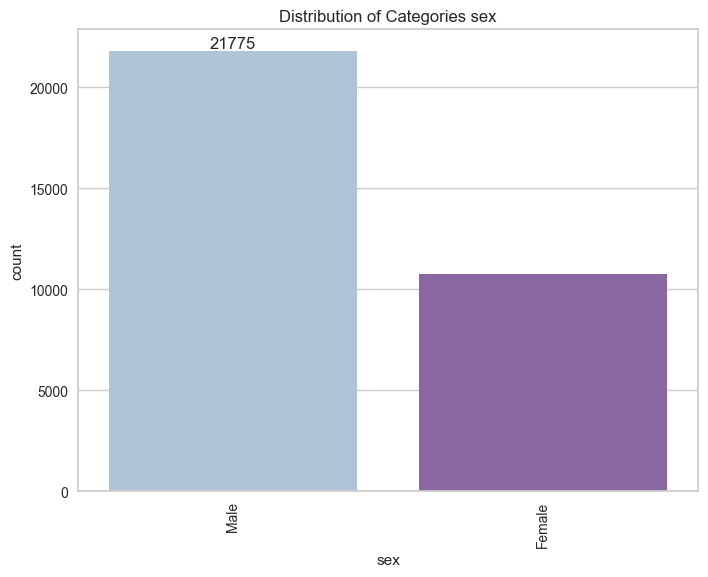

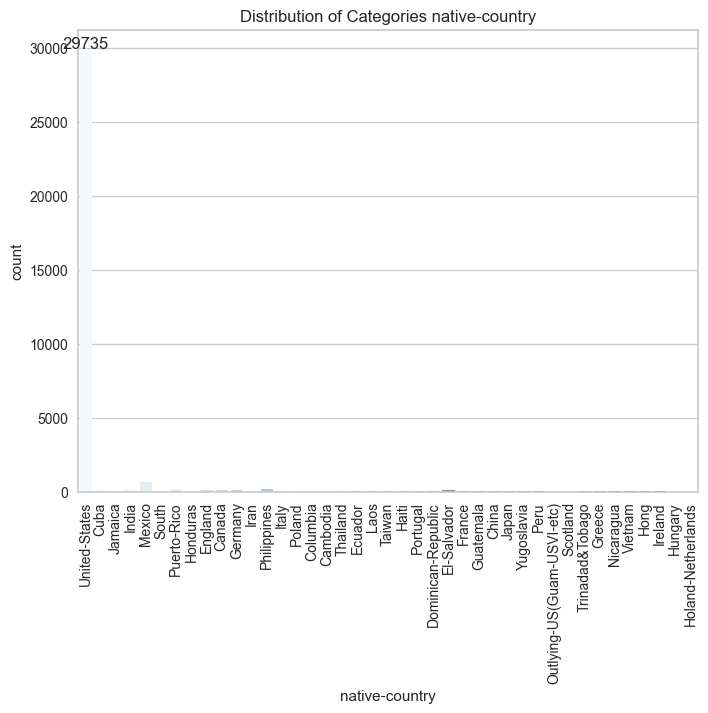

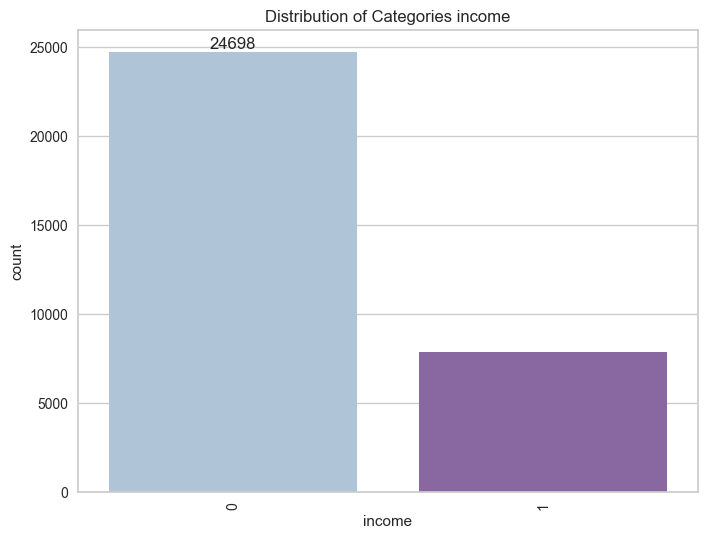

In [902]:
# DISTRIBUTIONS OF CATEGORICAL FEATURES;

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=train_data, palette='BuPu')
    plt.title(f'Distribution of Categories {column}')

    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [903]:
value_cnt_fonc(train_data, 'education')

education  counts  norm_counts
0        HS-grad   10494     0.322525
1   Some-college    7282     0.223807
2      Bachelors    5353     0.164520
3        Masters    1722     0.052924
4      Assoc-voc    1382     0.042475
5           11th    1175     0.036113
6     Assoc-acdm    1067     0.032793
7           10th     933     0.028675
8        7th-8th     645     0.019824
9    Prof-school     576     0.017703
10           9th     514     0.015797
11          12th     433     0.013308
12     Doctorate     413     0.012693
13       5th-6th     332     0.010204
14       1st-4th     166     0.005102
15     Preschool      50     0.001537

In [904]:
train_data['education'].replace(['1st-4th', '5th-6th'], 'Primary', inplace=True)
train_data['education'].replace(['7th-8th', '9th', '10th', '11th', '12th'], 'Middle-School', inplace=True)
train_data['education'].replace(['HS-grad'], 'High-School', inplace=True)
train_data['education'].replace(['Some-college', 'Assoc-voc', 'Assoc-acdm'], 'College', inplace=True)
train_data['education'].replace(['Bachelors'], 'Bachelors', inplace=True)
train_data['education'].replace(['Prof-school', 'Doctorate'], 'Doctorate', inplace=True)

value_cnt_fonc(train_data, 'education')

education  counts  norm_counts
0    High-School   10494     0.322525
1        College    9731     0.299075
2      Bachelors    5353     0.164520
3  Middle-School    3700     0.113717
4        Masters    1722     0.052924
5      Doctorate     989     0.030396
6        Primary     498     0.015306
7      Preschool      50     0.001537

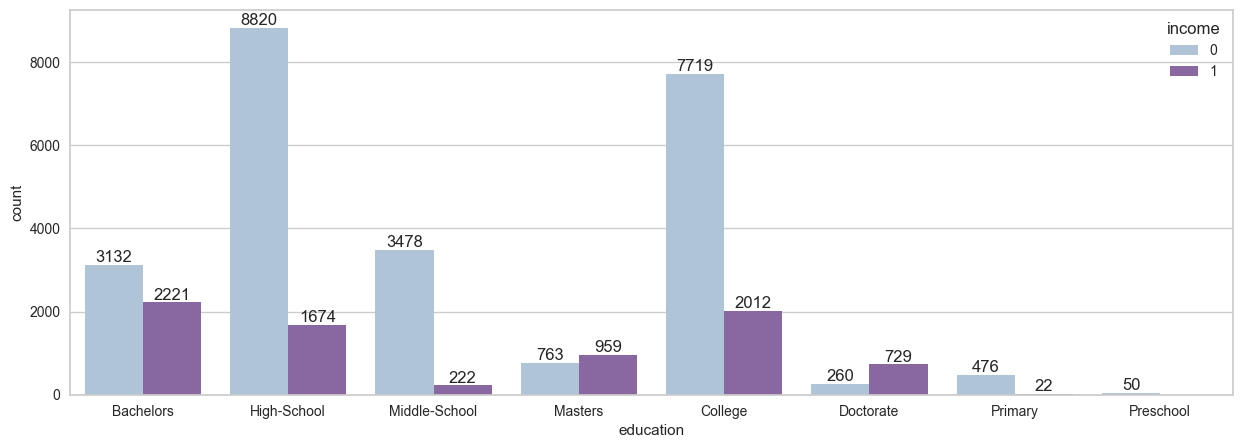

In [905]:
plt.figure(figsize=(15,5))
ax = sns.countplot( data=train_data, x="education",hue="income", palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [906]:
value_cnt_fonc(train_data, 'race')

race  counts  norm_counts
0               White   27795     0.854258
1               Black    3122     0.095952
2  Asian-Pac-Islander    1038     0.031902
3  Amer-Indian-Eskimo     311     0.009558
4               Other     271     0.008329

In [907]:
train_data['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Others', inplace = True)

value_cnt_fonc(train_data, 'race')

race  counts  norm_counts
0    White   27795     0.854258
1    Black    3122     0.095952
2   Others    1620     0.049789

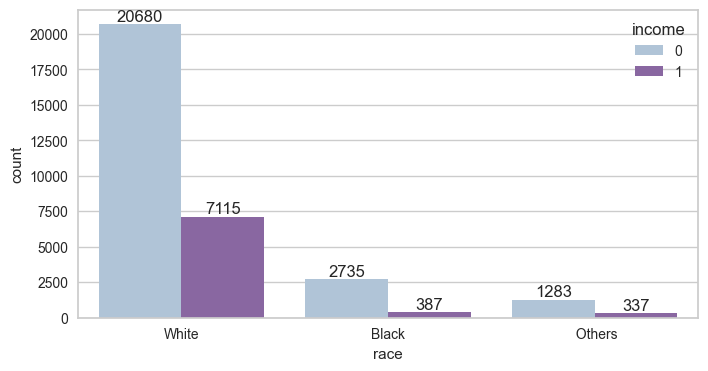

In [908]:
plt.figure(figsize=(8,4))
ax = sns.countplot( data=train_data, x="race",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [909]:
value_cnt_fonc(train_data, 'native-country')

native-country  counts  norm_counts
0                United-States   29735     0.913883
1                       Mexico     639     0.019639
2                  Philippines     198     0.006085
3                      Germany     137     0.004211
4                       Canada     121     0.003719
5                  Puerto-Rico     114     0.003504
6                  El-Salvador     106     0.003258
7                        India     100     0.003073
8                         Cuba      95     0.002920
9                      England      90     0.002766
10                     Jamaica      81     0.002489
11                       South      80     0.002459
12                       China      75     0.002305
13                       Italy      73     0.002244
14          Dominican-Republic      70     0.002151
15                     Vietnam      67     0.002059
16                       Japan      62     0.001906
17                   Guatemala      62     0.001906
18                      Poland      60     0.001844
19                    Columbia      59     0.001813
20                      Taiwan      51     0.001567
21                       Haiti      44     0.001352
22                        Iran      43     0.001322
23                    Portugal      37     0.001137
24                   Nicaragua      34     0.001045
25                        Peru      31     0.000953
26                      France      29     0.000891
27                      Greece      29     0.000891
28                     Ecuador      28     0.000861
29                     Ireland      24     0.000738
30                        Hong      20     0.000615
31                    Cambodia      19     0.000584
32             Trinadad&Tobago      19     0.000584
33                        Laos      18     0.000553
34                    Thailand      18     0.000553
35                  Yugoslavia      16     0.000492
36  Outlying-US(Guam-USVI-etc)      14     0.000430
37                    Honduras      13     0.000400
38                     Hungary      13     0.000400
39                    Scotland      12     0.000369
40          Holand-Netherlands       1     0.000031

In [910]:
# Replaces all values in the native.country column that are not "United-States" with "Others."

train_data['native-country'].loc[train_data['native-country'] != 'United-States'] = 'Others'

value_cnt_fonc(train_data, 'native-country')

native-country  counts  norm_counts
0  United-States   29735     0.913883
1         Others    2802     0.086117

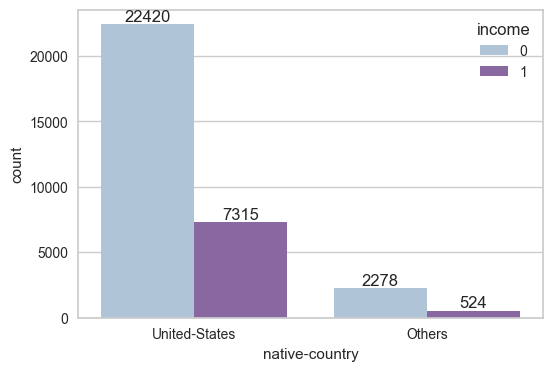

In [911]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=train_data, x="native-country",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [912]:
value_cnt_fonc(train_data, 'workclass')

workclass  counts  norm_counts
0           Private   24509     0.753266
1  Self-emp-not-inc    2540     0.078065
2         Local-gov    2093     0.064327
3         State-gov    1298     0.039893
4      Self-emp-inc    1116     0.034299
5       Federal-gov     960     0.029505
6       Without-pay      14     0.000430
7      Never-worked       7     0.000215

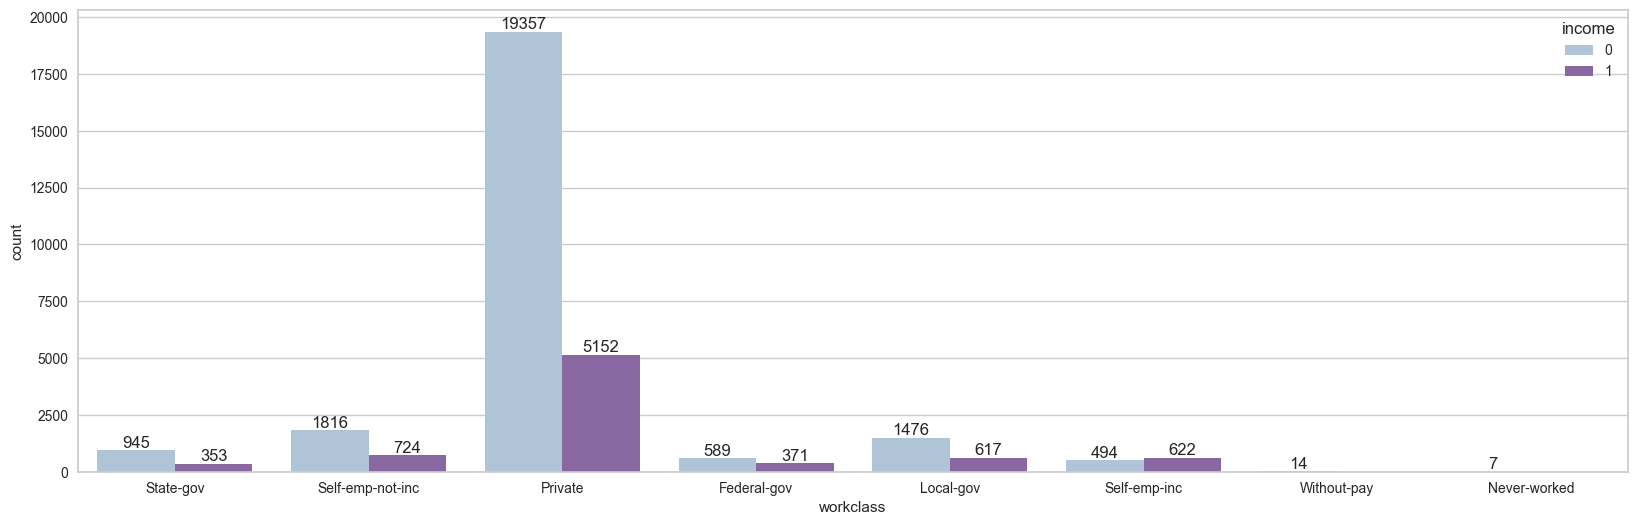

In [913]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=train_data, x="workclass",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [914]:
value_cnt_fonc(train_data, 'occupation')

occupation  counts  norm_counts
0      Prof-specialty    5979     0.183760
1        Craft-repair    4094     0.125826
2     Exec-managerial    4065     0.124935
3        Adm-clerical    3768     0.115807
4               Sales    3650     0.112180
5       Other-service    3291     0.101146
6   Machine-op-inspct    2000     0.061468
7    Transport-moving    1597     0.049083
8   Handlers-cleaners    1369     0.042075
9     Farming-fishing     992     0.030488
10       Tech-support     927     0.028491
11    Protective-serv     649     0.019947
12    Priv-house-serv     147     0.004518
13       Armed-Forces       9     0.000277

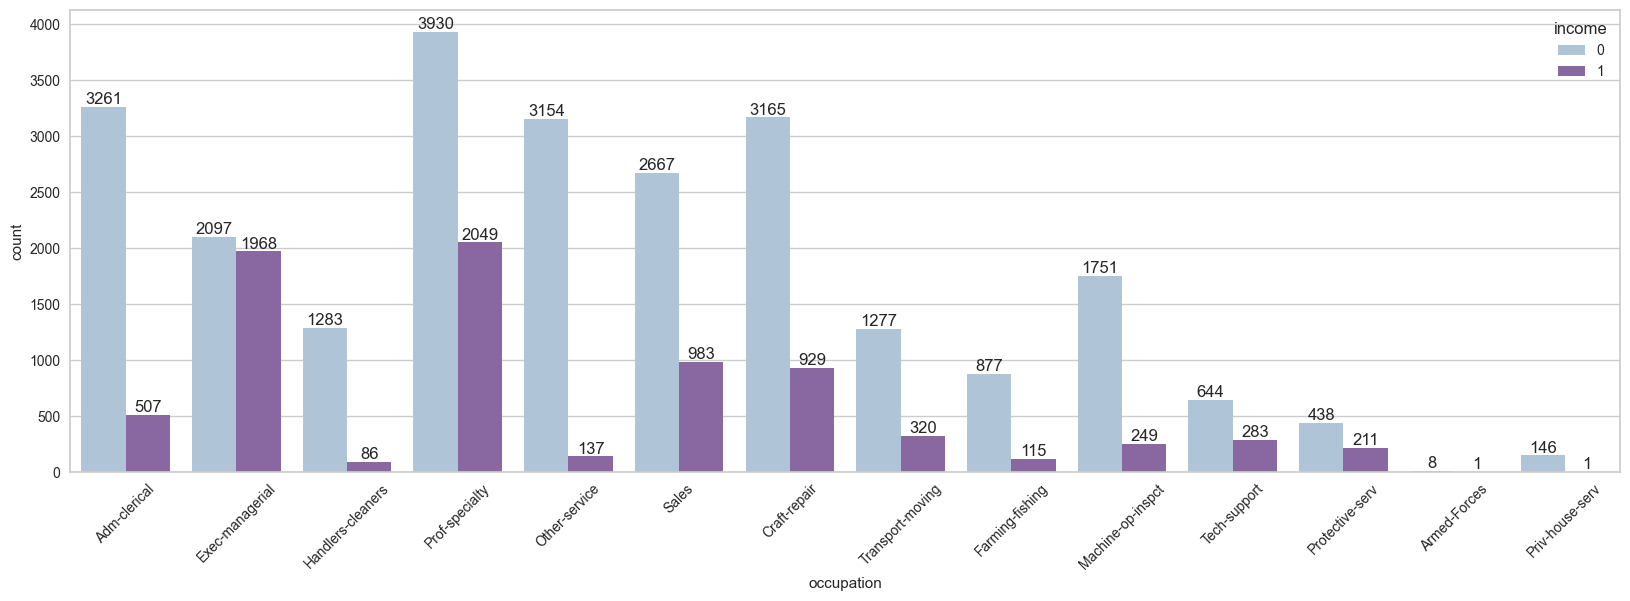

In [915]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=train_data, x="occupation",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

In [916]:
value_cnt_fonc(train_data, 'marital-status')

marital-status  counts  norm_counts
0     Married-civ-spouse   14970     0.460092
1          Never-married   10667     0.327842
2               Divorced    4441     0.136491
3              Separated    1025     0.031503
4                Widowed     993     0.030519
5  Married-spouse-absent     418     0.012847
6      Married-AF-spouse      23     0.000707

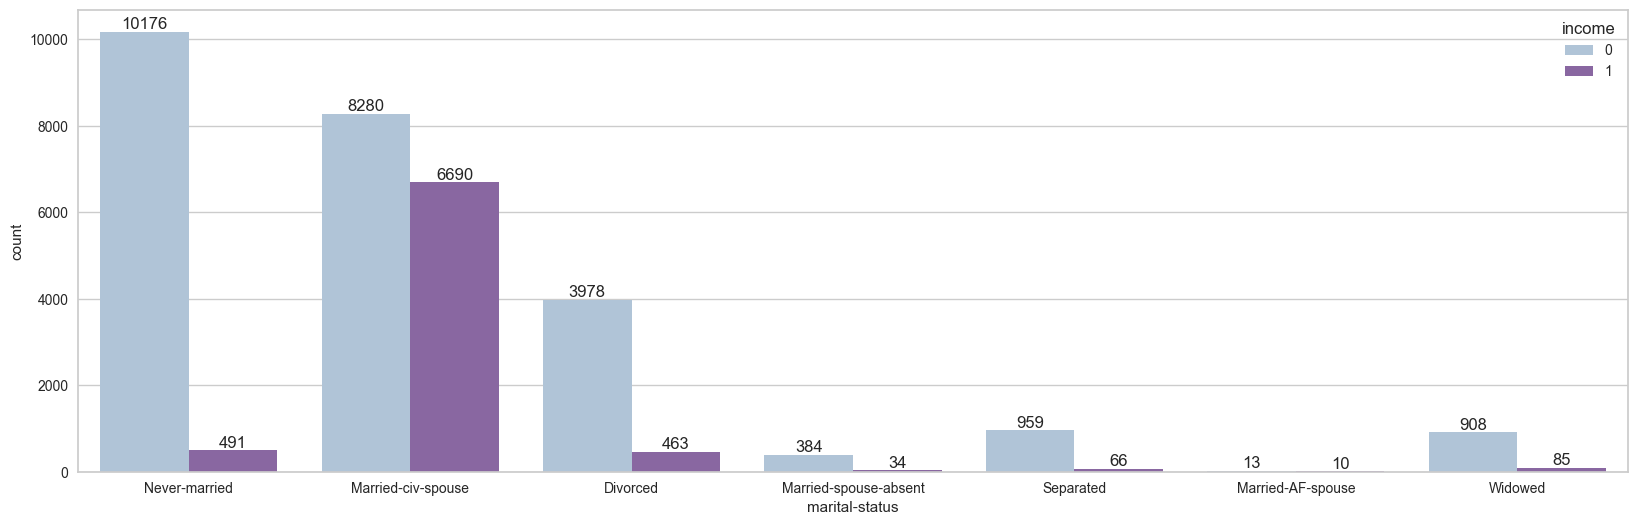

In [917]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=train_data, x="marital-status",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [918]:
value_cnt_fonc(train_data, 'relationship')

relationship  counts  norm_counts
0         Husband   13187     0.405292
1   Not-in-family    8292     0.254848
2       Own-child    5064     0.155638
3       Unmarried    3445     0.105879
4            Wife    1568     0.048191
5  Other-relative     981     0.030150

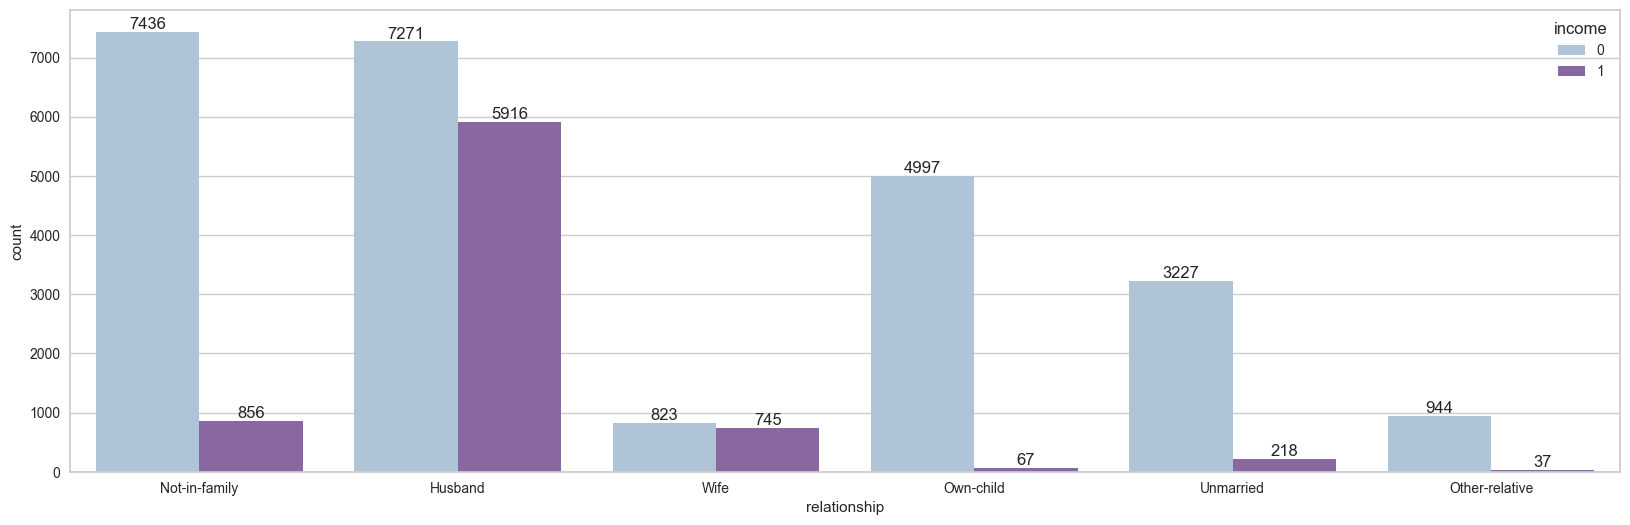

In [919]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=train_data, x="relationship",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [920]:
value_cnt_fonc(train_data, 'sex')

sex  counts  norm_counts
0    Male   21775     0.669238
1  Female   10762     0.330762

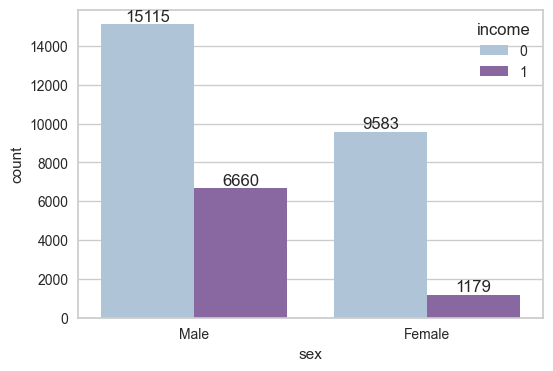

In [921]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=train_data, x="sex",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

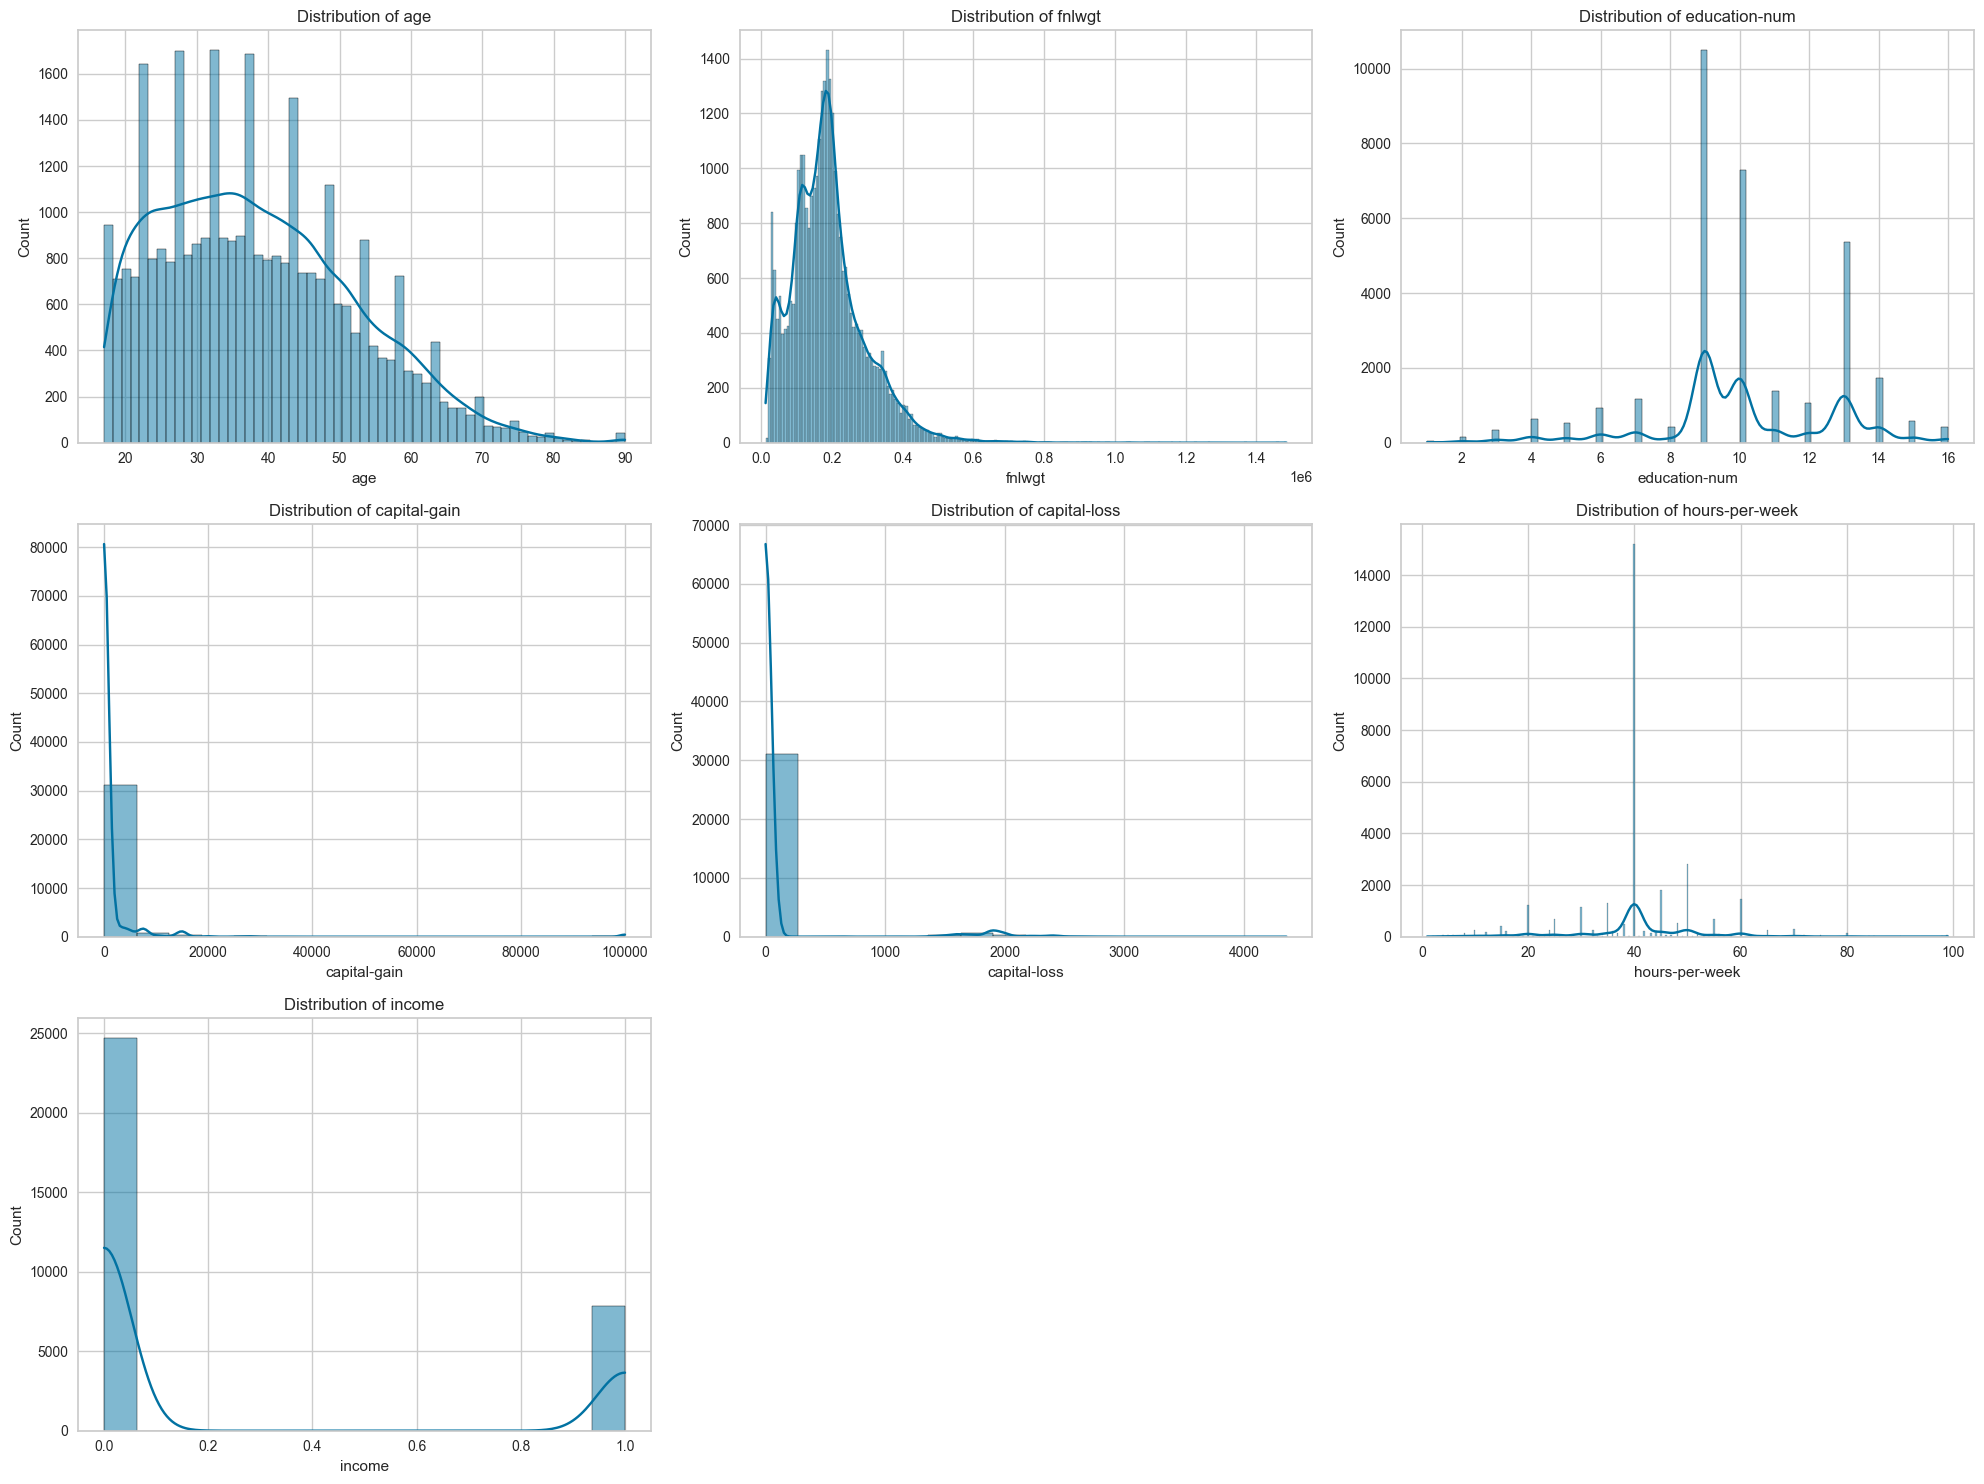

In [922]:
# DISTRIBUTIONS OF NUMERICAL FEATURES;

numerical_td = train_data.select_dtypes(include=['number'])

plt.figure(figsize=(20,15))

num_vars = len(numerical_td.columns)

for i, var in enumerate(numerical_td.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=train_data, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

In [923]:
px.histogram(train_data, x='age', color="income", barmode='group', title='Income Distribution by Age')

In [924]:
# Number of years of education completed by the individuals

value_cnt_fonc(train_data, 'education-num')

education-num  counts  norm_counts
0               9   10494     0.322525
1              10    7282     0.223807
2              13    5353     0.164520
3              14    1722     0.052924
4              11    1382     0.042475
5               7    1175     0.036113
6              12    1067     0.032793
7               6     933     0.028675
8               4     645     0.019824
9              15     576     0.017703
10              5     514     0.015797
11              8     433     0.013308
12             16     413     0.012693
13              3     332     0.010204
14              2     166     0.005102
15              1      50     0.001537

In [925]:
# Number of years of education completed by the individuals

px.histogram(train_data, x='education-num', color="income", barmode='group', title='Income Distribution by Education Num')

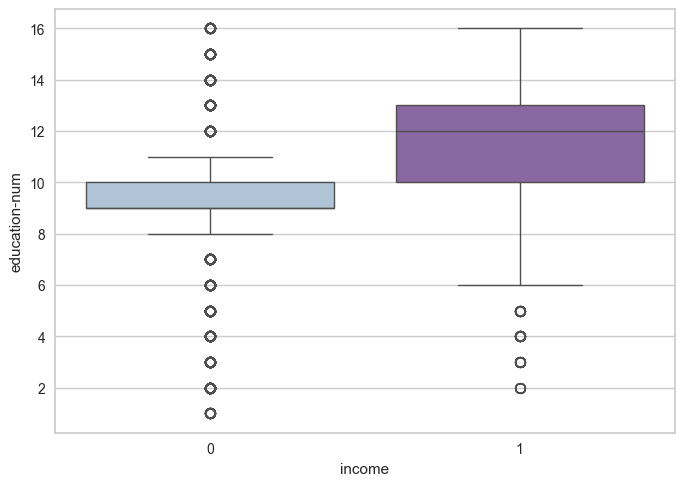

In [926]:
sns.boxplot(data=train_data,y="education-num",x='income', palette='BuPu');

In [927]:
value_cnt_fonc(train_data, 'capital-gain')

capital-gain  counts  norm_counts
0               0   29825     0.916649
1           15024     347     0.010665
2            7688     284     0.008729
3            7298     246     0.007561
4           99999     159     0.004887
..            ...     ...          ...
114          1111       1     0.000031
115          2538       1     0.000031
116         22040       1     0.000031
117          4931       1     0.000031
118          5060       1     0.000031

[119 rows x 3 columns]

In [928]:
value_cnt_fonc(train_data, 'capital-loss')

capital-loss  counts  norm_counts
0              0   31018     0.953315
1           1902     202     0.006208
2           1977     168     0.005163
3           1887     159     0.004887
4           1848      51     0.001567
..           ...     ...          ...
87          2080       1     0.000031
88          1539       1     0.000031
89          1844       1     0.000031
90          2489       1     0.000031
91          1411       1     0.000031

[92 rows x 3 columns]

In [929]:
train_data['capital_diff'] = train_data['capital-gain'] - train_data['capital-loss']
train_data['capital_diff'] = pd.cut(train_data['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
train_data['capital_diff'] = train_data['capital_diff'].astype('object')
train_data.drop(['capital-gain'], axis = 1, inplace = True)
train_data.drop(['capital-loss'], axis = 1, inplace = True)

value_cnt_fonc(train_data, 'capital_diff')

capital_diff  counts  norm_counts
0          Low   30889      0.94935
1         High    1648      0.05065

In [930]:
px.histogram(train_data, x='capital_diff', color="income", barmode='group', title='Income Distribution by Capital Diff')

In [931]:
value_cnt_fonc(train_data, 'hours-per-week')

hours-per-week  counts  norm_counts
0               40   15204     0.467283
1               50    2817     0.086578
2               45    1823     0.056029
3               60    1475     0.045333
4               35    1296     0.039832
..             ...     ...          ...
89              82       1     0.000031
90              92       1     0.000031
91              87       1     0.000031
92              74       1     0.000031
93              94       1     0.000031

[94 rows x 3 columns]

In [932]:
px.histogram(train_data, x='hours-per-week', color="income", barmode='group', title='Income Distribution by Hours per Week')

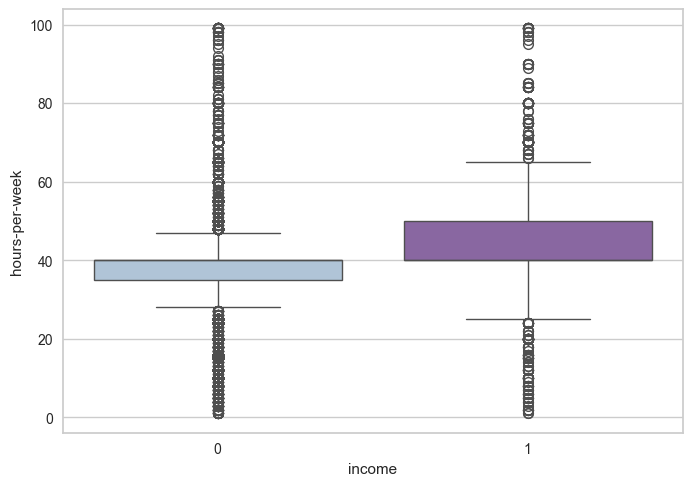

In [933]:
sns.boxplot(data=train_data,y="hours-per-week",x='income', palette='BuPu');

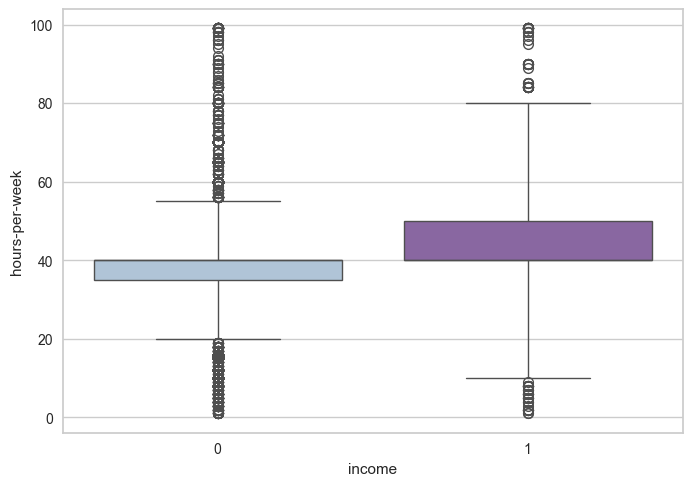

In [934]:
sns.boxplot(data=train_data,y="hours-per-week",x='income', palette='BuPu', whis=3);

In [935]:
# Total number of individuals who work more than 72 hours per week
len(train_data[train_data["hours-per-week"]>72])


427

In [936]:
# Total number of individuals who work less than 20 hours per week
len(train_data[train_data["hours-per-week"] < 20]) 

1700

In [937]:

# Total number of individuals who work more than 72 hours or less than 20 hours per week
len(train_data[(train_data["hours-per-week"] > 72) | (train_data["hours-per-week"] < 20)]) 


2127

In [938]:
# Remove the outlier on the column
df = train_data[~((train_data["hours-per-week"] > 72) | (train_data["hours-per-week"] < 20))]


In [939]:
train_data.shape

(32537, 14)

In [940]:
px.histogram(train_data, x='fnlwgt', color="income", barmode='group', title='Income Distribution by fnlwgt')

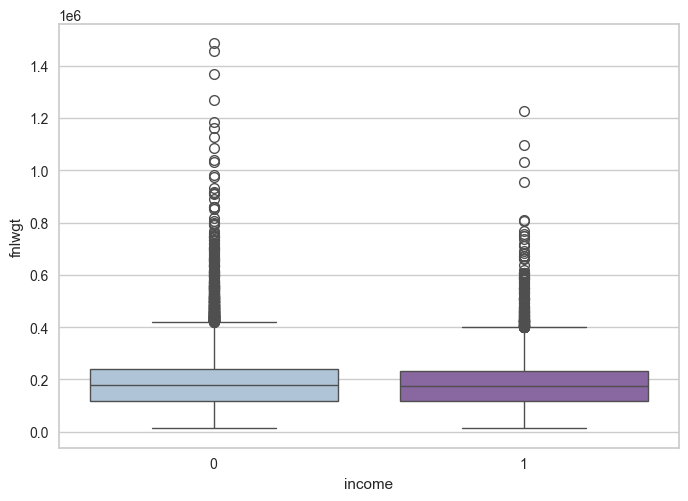

In [941]:
sns.boxplot(data=train_data,y="fnlwgt",x='income', palette='BuPu');

In [942]:
# Drop the 'fnlwgt' column

train_data.drop(['fnlwgt'], axis = 1, inplace = True)


In [943]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education       32537 non-null  object
 3   education-num   32537 non-null  int64 
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   hours-per-week  32537 non-null  int64 
 10  native-country  32537 non-null  object
 11  income          32537 non-null  int64 
 12  capital_diff    32537 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.5+ MB


In [944]:
train_data.sample(5)

age    workclass    education  education-num      marital-status  \
26507   19      Private  High-School              9       Never-married   
4267    49      Private    Bachelors             13  Married-civ-spouse   
26485   45      Private  High-School              9  Married-civ-spouse   
19966   19      Private  High-School              9       Never-married   
15500   35  Federal-gov  High-School              9       Never-married   

              occupation   relationship   race     sex  hours-per-week  \
26507       Adm-clerical      Own-child  White  Female              15   
4267        Craft-repair        Husband  White    Male              40   
26485  Machine-op-inspct        Husband  Black    Male              40   
19966      Other-service      Own-child  White  Female              40   
15500       Adm-clerical  Not-in-family  White    Male              40   

      native-country  income capital_diff  
26507  United-States       0          Low  
4267   United-States       1          Low  
26485  United-States       0          Low  
19966  United-States       0          Low  
15500  United-States       0          Low

In [945]:
### Correlations

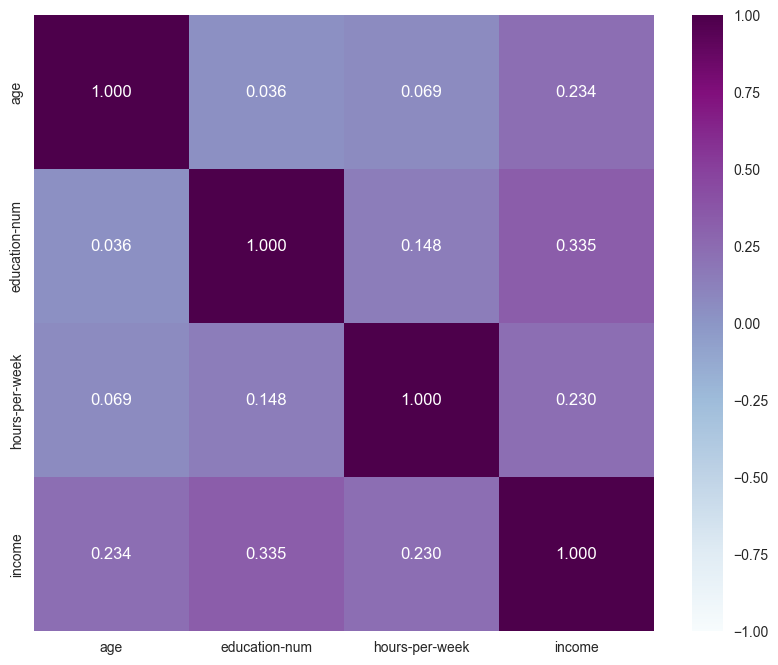

In [946]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.select_dtypes("number").corr(), vmin = -1, vmax = 1, annot = True, fmt = '.3f', cmap='BuPu');

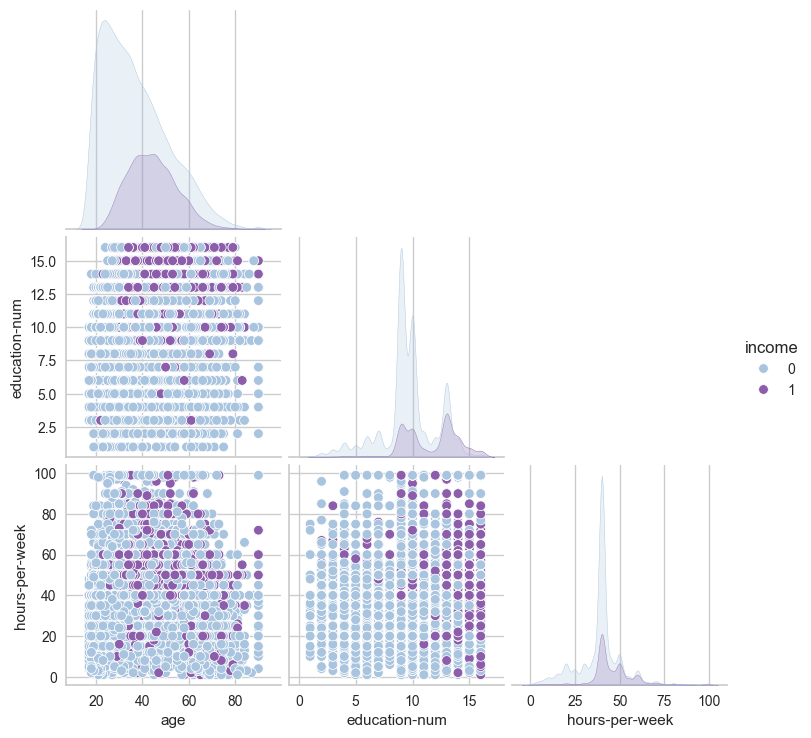

In [947]:
sns.pairplot(data=train_data, corner=True, hue='income',palette='BuPu');

In [948]:
# Check Multicolinarty between features

def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

train_data.select_dtypes("number").corr().style.map(color_custom)

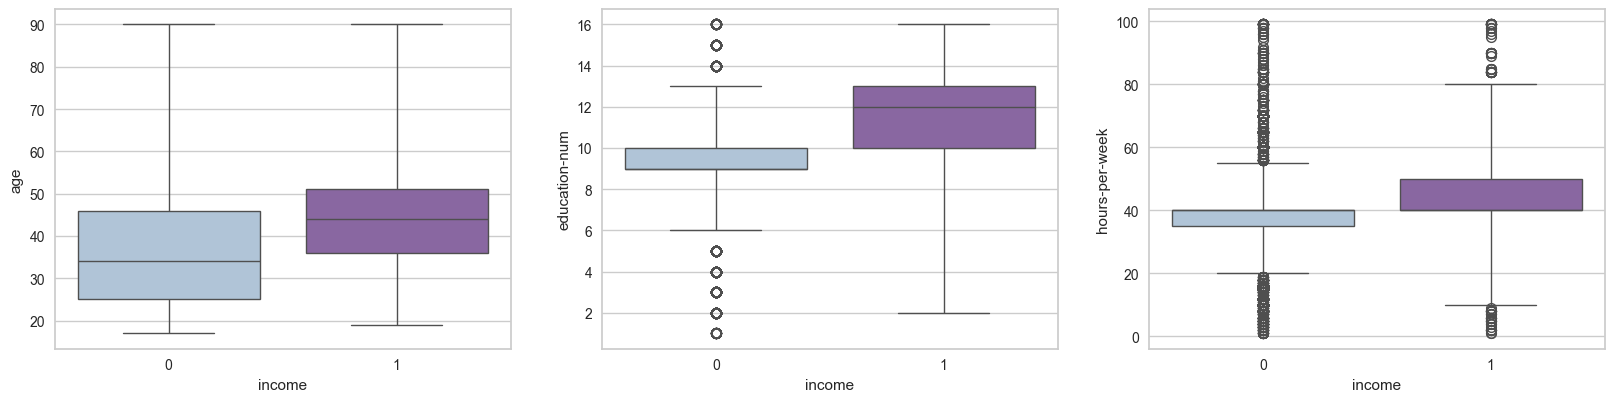

In [949]:
# Checking Outliers on Numerical Features by the Target // whis=3

index = 0
plt.figure(figsize=(20,15))
for feature in train_data.select_dtypes(include=['number']).columns:
    if feature != "income":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='income',y=feature,data=train_data, whis=3, palette='BuPu') 
plt.show()

### Data Pre-Processing for Modeling

In [950]:
# Cleaning Test Dataset

#Loading data
test_data = pd.read_csv('adult.test', header=None, names=column_names, na_values=' ?', skipinitialspace=True, skiprows=1)
test_data["income"] = test_data["income"].replace({" <=50K.": "<=50K", " >50K.": ">50K"})

test_data.shape

(16281, 15)

### Summary of Test Dataset

In [951]:
summary(test_data)

Data shape: (16281, 15)
___________________________
Data Types:
Types
object    9
int64     6
Name: count, dtype: int64
___________________________


Types  Counts  Uniques  Nulls                 Min  \
age              int64   16281       73      0                  17   
capital-gain     int64   16281      113      0                   0   
capital-loss     int64   16281       82      0                   0   
education       object   16281       16      0                10th   
education-num    int64   16281       16      0                   1   
fnlwgt           int64   16281    12787      0               13492   
hours-per-week   int64   16281       89      0                   1   
income          object   16281        2      0               <=50K   
marital-status  object   16281        7      0            Divorced   
native-country  object   16281       41      0                   ?   
occupation      object   16281       15      0                   ?   
race            object   16281        5      0  Amer-Indian-Eskimo   
relationship    object   16281        6      0             Husband   
sex             object   16281        2      0              Female   
workclass       object   16281        9      0                   ?   

                             Max  
age                           90  
capital-gain               99999  
capital-loss                3770  
education           Some-college  
education-num                 16  
fnlwgt                   1490400  
hours-per-week                99  
income                      >50K  
marital-status           Widowed  
native-country        Yugoslavia  
occupation      Transport-moving  
race                       White  
relationship                Wife  
sex                         Male  
workclass            Without-pay

In [952]:
### Cleaning of Test Dataset

In [953]:
duplicate_values(test_data)

Duplicate check...
There are 5 duplicated observations in the dataset.
5 duplicates were dropped!
No more duplicate rows!


In [954]:
get_unique_values(test_data)

Column Name  Number of Unique Values  \
0              age                       73   
1        workclass                        9   
2           fnlwgt                    12787   
3        education                       16   
4    education-num                       16   
5   marital-status                        7   
6       occupation                       15   
7     relationship                        6   
8             race                        5   
9              sex                        2   
10    capital-gain                      113   
11    capital-loss                       82   
12  hours-per-week                       89   
13  native-country                       41   
14          income                        2   

                                       Unique Values  Data Type  
0                                                   -     int64  
1   [Private, Local-gov, ?, Self-emp-not-inc, Fede...    object  
2                                                   -     int64  
3                                                   -    object  
4                                                   -     int64  
5   [Never-married, Married-civ-spouse, Widowed, D...    object  
6                                                   -    object  
7   [Own-child, Husband, Not-in-family, Unmarried,...    object  
8   [Black, White, Asian-Pac-Islander, Other, Amer...    object  
9                                      [Male, Female]    object  
10                                                  -     int64  
11                                                  -     int64  
12                                                  -     int64  
13                                                  -    object  
14                                      [<=50K, >50K]    object

In [955]:
missing_values(test_data)

count  percentage
age                 0         0.0
workclass           0         0.0
fnlwgt              0         0.0
education           0         0.0
education-num       0         0.0
marital-status      0         0.0
occupation          0         0.0
relationship        0         0.0
race                0         0.0
sex                 0         0.0
capital-gain        0         0.0
capital-loss        0         0.0
hours-per-week      0         0.0
native-country      0         0.0
income              0         0.0

In [956]:
test_data[test_data == '?'] = np.nan
missing_values(test_data)

count  percentage
age                 0        0.00
workclass         963        5.92
fnlwgt              0        0.00
education           0        0.00
education-num       0        0.00
marital-status      0        0.00
occupation        966        5.94
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital-gain        0        0.00
capital-loss        0        0.00
hours-per-week      0        0.00
native-country    274        1.68
income              0        0.00

In [957]:
#Handle Missing Values

test_data['workclass'].value_counts(normalize=True)


workclass
Private             0.731797
Self-emp-not-inc    0.086267
Local-gov           0.068112
State-gov           0.044603
Self-emp-inc        0.037746
Federal-gov         0.030823
Without-pay         0.000457
Never-worked        0.000196
Name: proportion, dtype: float64

In [958]:
test_data['workclass'] = test_data['workclass'].fillna('Private')
missing_values(test_data)


count  percentage
age                 0        0.00
workclass           0        0.00
fnlwgt              0        0.00
education           0        0.00
education-num       0        0.00
marital-status      0        0.00
occupation        966        5.94
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital-gain        0        0.00
capital-loss        0        0.00
hours-per-week      0        0.00
native-country    274        1.68
income              0        0.00

In [959]:
test_data['occupation'].value_counts(normalize=True)


occupation
Prof-specialty       0.132658
Exec-managerial      0.131875
Craft-repair         0.131483
Sales                0.121097
Adm-clerical         0.120183
Other-service        0.106336
Machine-op-inspct    0.066558
Transport-moving     0.049510
Handlers-cleaners    0.045852
Tech-support         0.033834
Farming-fishing      0.032332
Protective-serv      0.021816
Priv-house-serv      0.006074
Armed-Forces         0.000392
Name: proportion, dtype: float64

In [960]:
test_data['occupation'] = test_data['occupation'].fillna(test_data['occupation'].mode()[0])
missing_values(test_data)


count  percentage
age                 0        0.00
workclass           0        0.00
fnlwgt              0        0.00
education           0        0.00
education-num       0        0.00
marital-status      0        0.00
occupation          0        0.00
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital-gain        0        0.00
capital-loss        0        0.00
hours-per-week      0        0.00
native-country    274        1.68
income              0        0.00

In [961]:
test_data['native-country'].value_counts(normalize=True)


native-country
United-States                 0.915948
Mexico                        0.019248
Philippines                   0.006062
Puerto-Rico                   0.004374
Germany                       0.004312
Canada                        0.003812
India                         0.003187
El-Salvador                   0.003062
China                         0.002937
Cuba                          0.002687
England                       0.002312
South                         0.002187
Dominican-Republic            0.002062
Italy                         0.002000
Haiti                         0.001937
Portugal                      0.001875
Japan                         0.001875
Poland                        0.001687
Columbia                      0.001625
Jamaica                       0.001562
Guatemala                     0.001500
Greece                        0.001250
Vietnam                       0.001187
Ecuador                       0.001062
Iran                          0.001000
Peru      

In [962]:
test_data['native-country'].mode()[0]

'United-States'

In [963]:
test_data['native-country'] = test_data['native-country'].fillna('United-States')
missing_values(test_data)

count  percentage
age                 0         0.0
workclass           0         0.0
fnlwgt              0         0.0
education           0         0.0
education-num       0         0.0
marital-status      0         0.0
occupation          0         0.0
relationship        0         0.0
race                0         0.0
sex                 0         0.0
capital-gain        0         0.0
capital-loss        0         0.0
hours-per-week      0         0.0
native-country      0         0.0
income              0         0.0

In [964]:
test_cat_features = test_data.select_dtypes(include='object').columns
test_num_features = test_data.select_dtypes(include=['int64','float64']).columns


print('Test Categoricals:', list(test_cat_features))
print('---------------------------')
print('Test Numericals:',list(test_num_features))

Test Categoricals: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
---------------------------
Test Numericals: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [965]:
value_cnt_fonc(test_data, 'income')

income  counts  norm_counts
0  <=50K   12430     0.763701
1   >50K    3846     0.236299

In [966]:

test_data['income'] = test_data['income'].map({'<=50K': 0, '>50K': 1})

In [967]:
test_data.sample(5)

age workclass  fnlwgt  education  education-num      marital-status  \
16269   32   Private  173449    HS-grad              9  Married-civ-spouse   
2958    37   Private  175185  Assoc-voc             11       Never-married   
4944    42   Private  152889    7th-8th              4  Married-civ-spouse   
1486    39   Private  560313    Masters             14  Married-civ-spouse   
5976    44   Private   76487    HS-grad              9  Married-civ-spouse   

              occupation   relationship   race   sex  capital-gain  \
16269  Handlers-cleaners        Husband  White  Male             0   
2958   Handlers-cleaners  Not-in-family  White  Male             0   
4944        Craft-repair        Husband  White  Male          4386   
1486      Prof-specialty        Husband  Black  Male             0   
5976    Transport-moving        Husband  White  Male             0   

       capital-loss  hours-per-week native-country  income  
16269             0              40  United-States       0  
2958              0              40  United-States       0  
4944              0              50  United-States       1  
1486              0              45  United-States       1  
5976              0              40  United-States       0

In [968]:
income_less_50K = test_data[test_data['income'] == 0].shape[0]
income_over_50K = test_data[test_data['income'] == 1].shape[0]

print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

Income <= 50K (0) count: 12430
Income >  50K (1) count: 3846


In [969]:
value_cnt_fonc(test_data, 'education')

education  counts  norm_counts
0        HS-grad    5283     0.324588
1   Some-college    3587     0.220386
2      Bachelors    2667     0.163861
3        Masters     934     0.057385
4      Assoc-voc     678     0.041656
5           11th     637     0.039137
6     Assoc-acdm     534     0.032809
7           10th     456     0.028017
8        7th-8th     309     0.018985
9    Prof-school     258     0.015852
10           9th     242     0.014869
11          12th     223     0.013701
12     Doctorate     181     0.011121
13       5th-6th     176     0.010813
14       1st-4th      79     0.004854
15     Preschool      32     0.001966

In [970]:
test_data['education'].replace(['1st-4th', '5th-6th'], 'Primary', inplace=True)
test_data['education'].replace(['7th-8th', '9th', '10th', '11th', '12th'], 'Middle-School', inplace=True)
test_data['education'].replace(['HS-grad'], 'High-School', inplace=True)
test_data['education'].replace(['Some-college', 'Assoc-voc', 'Assoc-acdm'], 'College', inplace=True)
test_data['education'].replace(['Bachelors'], 'Bachelors', inplace=True)
test_data['education'].replace(['Prof-school', 'Doctorate'], 'Doctorate', inplace=True)

value_cnt_fonc(test_data, 'education')

education  counts  norm_counts
0    High-School    5283     0.324588
1        College    4799     0.294851
2      Bachelors    2667     0.163861
3  Middle-School    1867     0.114709
4        Masters     934     0.057385
5      Doctorate     439     0.026972
6        Primary     255     0.015667
7      Preschool      32     0.001966

In [971]:
value_cnt_fonc(test_data, 'race')

race  counts  norm_counts
0               White   13941     0.856537
1               Black    1561     0.095908
2  Asian-Pac-Islander     480     0.029491
3  Amer-Indian-Eskimo     159     0.009769
4               Other     135     0.008294

In [972]:
value_cnt_fonc(test_data, 'race')

race  counts  norm_counts
0               White   13941     0.856537
1               Black    1561     0.095908
2  Asian-Pac-Islander     480     0.029491
3  Amer-Indian-Eskimo     159     0.009769
4               Other     135     0.008294

In [973]:
value_cnt_fonc(test_data, 'native-country')

native-country  counts  norm_counts
0                United-States   14931     0.917363
1                       Mexico     308     0.018924
2                  Philippines      97     0.005960
3                  Puerto-Rico      70     0.004301
4                      Germany      69     0.004239
5                       Canada      61     0.003748
6                        India      51     0.003133
7                  El-Salvador      49     0.003011
8                        China      47     0.002888
9                         Cuba      43     0.002642
10                     England      37     0.002273
11                       South      35     0.002150
12          Dominican-Republic      33     0.002028
13                       Italy      32     0.001966
14                       Haiti      31     0.001905
15                    Portugal      30     0.001843
16                       Japan      30     0.001843
17                      Poland      27     0.001659
18                    Columbia      26     0.001597
19                     Jamaica      25     0.001536
20                   Guatemala      24     0.001475
21                      Greece      20     0.001229
22                     Vietnam      19     0.001167
23                     Ecuador      17     0.001044
24                        Iran      16     0.000983
25                        Peru      15     0.000922
26                   Nicaragua      15     0.000922
27                      Taiwan      14     0.000860
28                     Ireland      13     0.000799
29                    Thailand      12     0.000737
30                        Hong      10     0.000614
31  Outlying-US(Guam-USVI-etc)       9     0.000553
32                      France       9     0.000553
33                    Scotland       9     0.000553
34                    Cambodia       9     0.000553
35             Trinadad&Tobago       8     0.000492
36                  Yugoslavia       7     0.000430
37                    Honduras       7     0.000430
38                     Hungary       6     0.000369
39                        Laos       5     0.000307

In [974]:
test_data['native-country'].loc[test_data['native-country'] != 'United-States'] = 'Others'
value_cnt_fonc(test_data, 'native-country')

native-country  counts  norm_counts
0  United-States   14931     0.917363
1         Others    1345     0.082637

In [975]:
value_cnt_fonc(test_data, 'workclass')

workclass  counts  norm_counts
0           Private   12169     0.747665
1  Self-emp-not-inc    1321     0.081162
2         Local-gov    1043     0.064082
3         State-gov     683     0.041964
4      Self-emp-inc     578     0.035512
5       Federal-gov     472     0.029000
6       Without-pay       7     0.000430
7      Never-worked       3     0.000184

In [976]:
value_cnt_fonc(test_data, 'occupation')

occupation  counts  norm_counts
0      Prof-specialty    2997     0.184136
1     Exec-managerial    2019     0.124048
2        Craft-repair    2013     0.123679
3               Sales    1854     0.113910
4        Adm-clerical    1840     0.113050
5       Other-service    1628     0.100025
6   Machine-op-inspct    1019     0.062608
7    Transport-moving     758     0.046572
8   Handlers-cleaners     702     0.043131
9        Tech-support     518     0.031826
10    Farming-fishing     495     0.030413
11    Protective-serv     334     0.020521
12    Priv-house-serv      93     0.005714
13       Armed-Forces       6     0.000369

In [977]:
value_cnt_fonc(test_data, 'marital-status')

marital-status  counts  norm_counts
0     Married-civ-spouse    7402     0.454780
1          Never-married    5431     0.333681
2               Divorced    2189     0.134493
3                Widowed     525     0.032256
4              Separated     505     0.031027
5  Married-spouse-absent     210     0.012902
6      Married-AF-spouse      14     0.000860

In [978]:
value_cnt_fonc(test_data, 'relationship')

relationship  counts  norm_counts
0         Husband    6522     0.400713
1   Not-in-family    4275     0.262657
2       Own-child    2512     0.154338
3       Unmarried    1679     0.103158
4            Wife     763     0.046879
5  Other-relative     525     0.032256

In [979]:
value_cnt_fonc(test_data, 'sex')

sex  counts  norm_counts
0    Male   10856     0.666994
1  Female    5420     0.333006

In [980]:
value_cnt_fonc(test_data, 'education-num')

education-num  counts  norm_counts
0               9    5283     0.324588
1              10    3587     0.220386
2              13    2667     0.163861
3              14     934     0.057385
4              11     678     0.041656
5               7     637     0.039137
6              12     534     0.032809
7               6     456     0.028017
8               4     309     0.018985
9              15     258     0.015852
10              5     242     0.014869
11              8     223     0.013701
12             16     181     0.011121
13              3     176     0.010813
14              2      79     0.004854
15              1      32     0.001966

In [981]:
value_cnt_fonc(test_data, 'capital-gain')

capital-gain  counts  norm_counts
0               0   14953     0.918715
1           15024     166     0.010199
2            7688     126     0.007741
3            7298     118     0.007250
4           99999      85     0.005222
..            ...     ...          ...
108          2062       1     0.000061
109         41310       1     0.000061
110          7262       1     0.000061
111          7978       1     0.000061
112          2936       1     0.000061

[113 rows x 3 columns]

In [982]:
value_cnt_fonc(test_data, 'capital-gain')

capital-gain  counts  norm_counts
0               0   14953     0.918715
1           15024     166     0.010199
2            7688     126     0.007741
3            7298     118     0.007250
4           99999      85     0.005222
..            ...     ...          ...
108          2062       1     0.000061
109         41310       1     0.000061
110          7262       1     0.000061
111          7978       1     0.000061
112          2936       1     0.000061

[113 rows x 3 columns]

In [983]:
test_data['capital_diff'] = test_data['capital-gain'] - test_data['capital-loss']
test_data['capital_diff'] = pd.cut(test_data['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
test_data['capital_diff'] = test_data['capital_diff'].astype('object')
test_data.drop(['capital-gain'], axis = 1, inplace = True)
test_data.drop(['capital-loss'], axis = 1, inplace = True)

value_cnt_fonc(test_data, 'capital_diff')

capital_diff  counts  norm_counts
0          Low   15473     0.950664
1         High     803     0.049336

In [984]:
value_cnt_fonc(test_data, 'hours-per-week')

hours-per-week  counts  norm_counts
0               40    7583     0.465901
1               50    1427     0.087675
2               45     893     0.054866
3               60     702     0.043131
4               35     639     0.039260
..             ...     ...          ...
84              67       2     0.000123
85              76       1     0.000061
86              79       1     0.000061
87              89       1     0.000061
88              69       1     0.000061

[89 rows x 3 columns]

In [985]:
test_data.drop(['fnlwgt'], axis = 1, inplace = True)


In [986]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16276 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16276 non-null  int64 
 1   workclass       16276 non-null  object
 2   education       16276 non-null  object
 3   education-num   16276 non-null  int64 
 4   marital-status  16276 non-null  object
 5   occupation      16276 non-null  object
 6   relationship    16276 non-null  object
 7   race            16276 non-null  object
 8   sex             16276 non-null  object
 9   hours-per-week  16276 non-null  int64 
 10  native-country  16276 non-null  object
 11  income          16276 non-null  int64 
 12  capital_diff    16276 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.7+ MB


In [987]:
X_train = train_data.drop(columns=["income"])
Y_train = train_data["income"]
X_test = test_data.drop(columns=["income"])
Y_test = test_data["income"] 

###  Label Encoding and Scaling for Modeling

In [988]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [989]:
onehot_categorics = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
ordinal_categorics = ["education", "capital_diff"]

column_transformed = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_categorics), 
                                       (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), ordinal_categorics),
                                       remainder='passthrough') 

In [990]:
# Fit train and Transform train-test data

X_train_trans = column_transformed.fit_transform(X_train) 
X_test_trans = column_transformed.transform(X_test)

In [991]:
X_train_trans.shape, X_test_trans.shape

((32537, 47), (16276, 47))

In [992]:
features = column_transformed.get_feature_names_out()
features

array(['onehotencoder__workclass_Federal-gov',
       'onehotencoder__workclass_Local-gov',
       'onehotencoder__workclass_Never-worked',
       'onehotencoder__workclass_Private',
       'onehotencoder__workclass_Self-emp-inc',
       'onehotencoder__workclass_Self-emp-not-inc',
       'onehotencoder__workclass_State-gov',
       'onehotencoder__workclass_Without-pay',
       'onehotencoder__marital-status_Divorced',
       'onehotencoder__marital-status_Married-AF-spouse',
       'onehotencoder__marital-status_Married-civ-spouse',
       'onehotencoder__marital-status_Married-spouse-absent',
       'onehotencoder__marital-status_Never-married',
       'onehotencoder__marital-status_Separated',
       'onehotencoder__marital-status_Widowed',
       'onehotencoder__occupation_Adm-clerical',
       'onehotencoder__occupation_Armed-Forces',
       'onehotencoder__occupation_Craft-repair',
       'onehotencoder__occupation_Exec-managerial',
       'onehotencoder__occupation_Farming-fish

In [993]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

onehotencoder__workclass_Federal-gov  onehotencoder__workclass_Local-gov  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 0.0   
3                                   0.0                                 0.0   
4                                   0.0                                 0.0   

   onehotencoder__workclass_Never-worked  onehotencoder__workclass_Private  \
0                                    0.0                               0.0   
1                                    0.0                               0.0   
2                                    0.0                               1.0   
3                                    0.0                               1.0   
4                                    0.0                               1.0   

   onehotencoder__workclass_Self-emp-inc  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   onehotencoder__workclass_Self-emp-not-inc  \
0                                        0.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   onehotencoder__workclass_State-gov  onehotencoder__workclass_Without-pay  \
0                                 1.0                                   0.0   
1                                 0.0                                   0.0   
2                                 0.0                                   0.0   
3                                 0.0                                   0.0   
4                                 0.0                                   0.0   

   onehotencoder__marital-status_Divorced  \
0                                     0.0   
1                                     0.0   
2                                     1.0   
3                                     0.0   
4                                     0.0   

   onehotencoder__marital-status_Married-AF-spouse  ...  \
0                                              0.0  ...   
1                                              0.0  ...   
2                                              0.0  ...   
3                                              0.0  ...   
4                                              0.0  ...   

   onehotencoder__race_White  onehotencoder__sex_Female  \
0                        1.0                        0.0   
1                        1.0                        0.0   
2                        1.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        1.0   

   onehotencoder__sex_Male  onehotencoder__native-country_Others  \
0                      1.0                                   0.0   
1                      1.0                                   0.0   
2                      1.0                                   0.0   
3                      1.0                                   0.0   
4                      0.0                                   1.0   

   onehotencoder__native-country_United-States  ordinalencoder__education  \
0                                          1.0                        0.0   
1                                          1.0                        0.0   
2                                          1.0                        3.0   
3                                          1.0                        5.0   
4                                          0.0                        0.0   

   ordinalencoder__capital_diff  remainder__age  remainder__education-num  \
0                           1.0            39.0                      13.0   
1                      

In [994]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

onehotencoder__workclass_Federal-gov  onehotencoder__workclass_Local-gov  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 1.0   
3                                   0.0                                 0.0   
4                                   0.0                                 0.0   

   onehotencoder__workclass_Never-worked  onehotencoder__workclass_Private  \
0                                    0.0                               1.0   
1                                    0.0                               1.0   
2                                    0.0                               0.0   
3                                    0.0                               1.0   
4                                    0.0                               1.0   

   onehotencoder__workclass_Self-emp-inc  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   onehotencoder__workclass_Self-emp-not-inc  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   onehotencoder__workclass_State-gov  onehotencoder__workclass_Without-pay  \
0                                 0.0                                   0.0   
1                                 0.0                                   0.0   
2                                 0.0                                   0.0   
3                                 0.0                                   0.0   
4                                 0.0                                   0.0   

   onehotencoder__marital-status_Divorced  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   onehotencoder__marital-status_Married-AF-spouse  ...  \
0                                              0.0  ...   
1                                              0.0  ...   
2                                              0.0  ...   
3                                              0.0  ...   
4                                              0.0  ...   

   onehotencoder__race_White  onehotencoder__sex_Female  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        1.0                        0.0   
3                        0.0                        0.0   
4                        1.0                        1.0   

   onehotencoder__sex_Male  onehotencoder__native-country_Others  \
0                      1.0                                   0.0   
1                      1.0                                   0.0   
2                      1.0                                   0.0   
3                      1.0                                   0.0   
4                      0.0                                   0.0   

   onehotencoder__native-country_United-States  ordinalencoder__education  \
0                                          1.0                        5.0   
1                                          1.0                        3.0   
2                                          1.0                        1.0   
3                                          1.0                        1.0   
4                                          1.0                        1.0   

   ordinalencoder__capital_diff  remainder__age  remainder__education-num  \
0                           1.0            25.0                       7.0   
1                      

In [995]:
corr_by_income = X_train.join(Y_train).corr()["income"].sort_values()[:-1]
corr_by_income

ordinalencoder__capital_diff                          -0.360177
onehotencoder__marital-status_Never-married           -0.318285
onehotencoder__relationship_Own-child                 -0.228593
onehotencoder__sex_Female                             -0.215969
onehotencoder__relationship_Not-in-family             -0.188299
ordinalencoder__education                             -0.162960
onehotencoder__occupation_Other-service               -0.156332
onehotencoder__relationship_Unmarried                 -0.142948
onehotencoder__marital-status_Divorced                -0.127060
onehotencoder__workclass_Private                      -0.125504
onehotencoder__occupation_Adm-clerical                -0.090019
onehotencoder__race_Black                             -0.089107
onehotencoder__occupation_Handlers-cleaners           -0.087286
onehotencoder__relationship_Other-relative            -0.083782
onehotencoder__marital-status_Separated               -0.074451
onehotencoder__occupation_Machine-op-ins

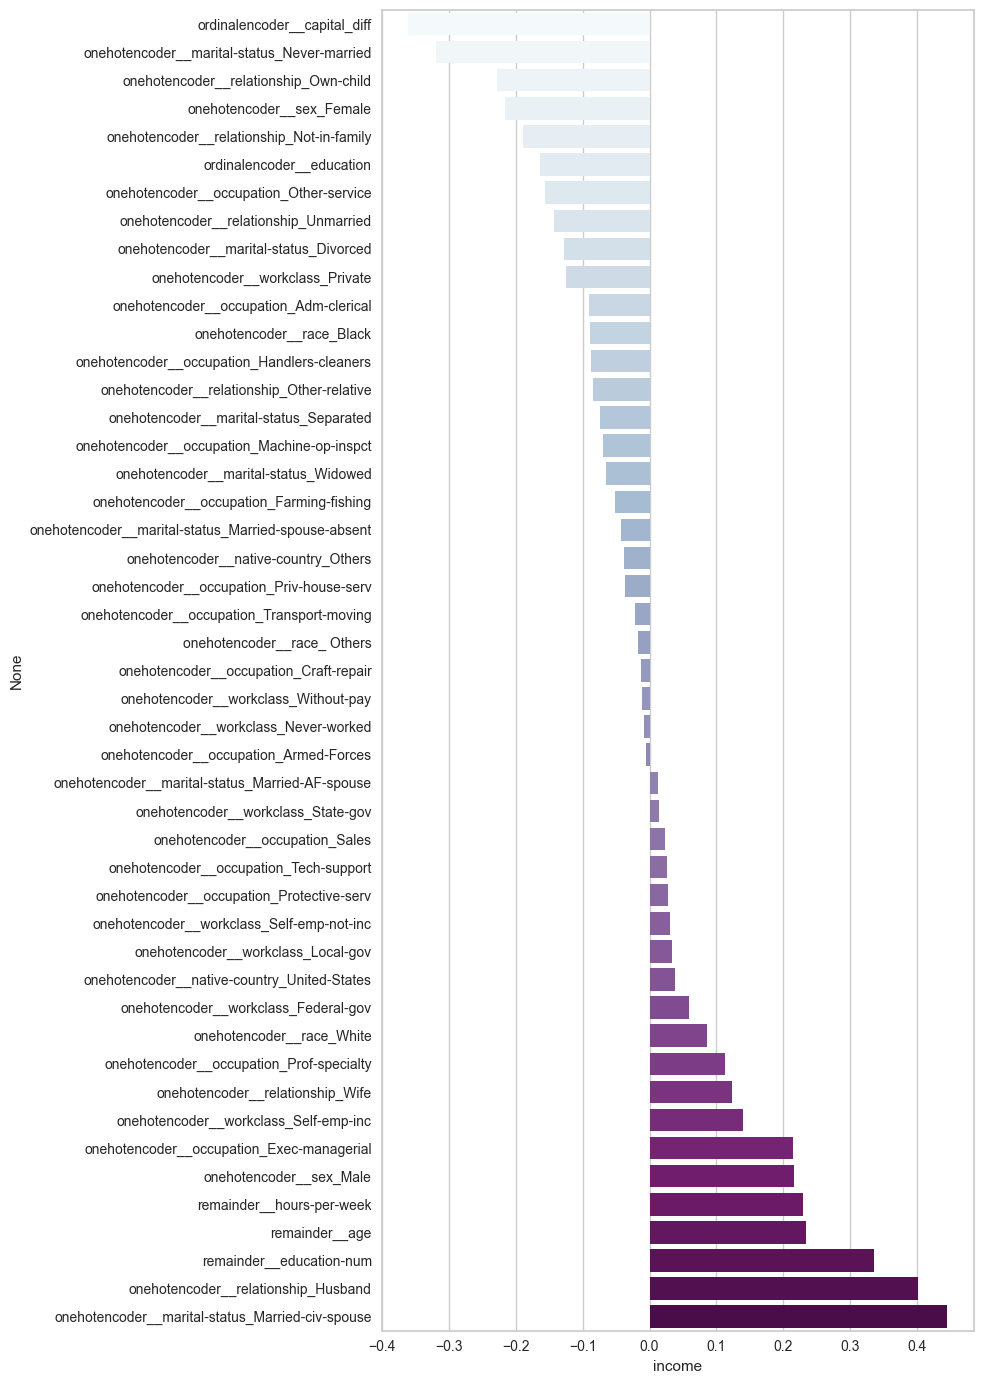

In [996]:
plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_income.index, x = corr_by_income,palette='BuPu')
plt.tight_layout();

### Logistic Regression Modeling for Prediction

In [997]:
logistic_model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])

logistic_model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logistic', LogisticRegression())])

In [998]:
# Prediction

y_pred=logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)

log_f1 = f1_score(Y_test, y_pred)
log_recall = recall_score(Y_test, y_pred)
log_auc = roc_auc_score(Y_test, y_pred)

In [999]:
# Get the coefficients
coefficients = logistic_model["logistic"].coef_[0]

feature_importances = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': coefficients
})

# Sort by importance
logistic_fi = feature_importances.sort_values(by='Importance', ascending=False)
logistic_fi.head(10)

Feature  Importance
45                          remainder__education-num    4.570977
46                         remainder__hours-per-week    2.956114
44                                    remainder__age    1.657062
9    onehotencoder__marital-status_Married-AF-spouse    1.285920
10  onehotencoder__marital-status_Married-civ-spouse    1.214257
34                  onehotencoder__relationship_Wife    1.004770
18         onehotencoder__occupation_Exec-managerial    0.825013
27            onehotencoder__occupation_Tech-support    0.680882
25         onehotencoder__occupation_Protective-serv    0.571501
0               onehotencoder__workclass_Federal-gov    0.463922

In [1000]:
print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

Income <= 50K (0) count: 12430
Income >  50K (1) count: 3846


In [1001]:
# Evaluate the Model Performans

# Function to Evaluate the Model Performans using Classification Confusion_matrix() 
# Also does the prediction in the function

def eval_metric(model, X_train, Y_train, X_test, Y_test, i):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(f"{i} Test_Set")
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(Y_train, y_train_pred))
    print(classification_report(Y_train, y_train_pred))

In [1002]:
# Evaluating the Model Performance using Classification Metrics

eval_metric(logistic_model, X_train, Y_train, X_test, Y_test, 'logistic_model')

logistic_model Test_Set
[[11552   878]
 [ 1606  2240]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12430
           1       0.72      0.58      0.64      3846

    accuracy                           0.85     16276
   macro avg       0.80      0.76      0.77     16276
weighted avg       0.84      0.85      0.84     16276


logistic_model Train_Set
[[23071  1627]
 [ 3227  4612]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     24698
           1       0.74      0.59      0.66      7839

    accuracy                           0.85     32537
   macro avg       0.81      0.76      0.78     32537
weighted avg       0.84      0.85      0.84     32537



logistic_model ROC_AUC Score: 0.8995949862129642
--------------------------------------------------


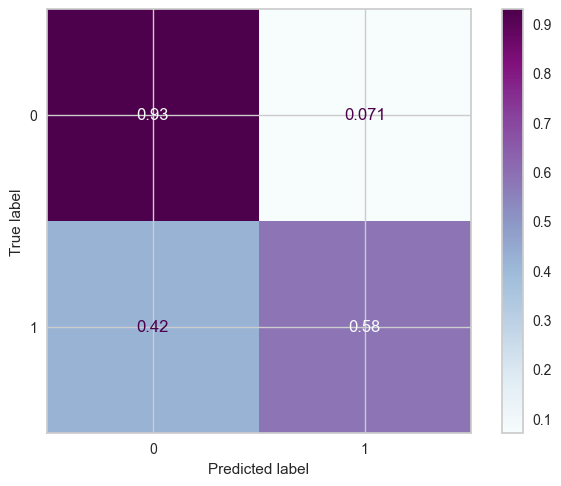

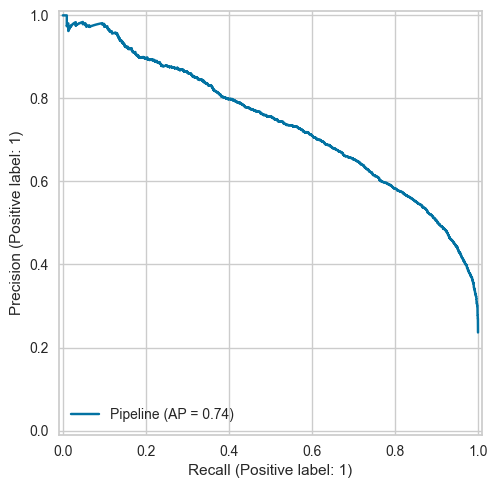

In [1003]:
# Roc_AUC_score
print('logistic_model ROC_AUC Score:', roc_auc_score(Y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
log_matrix = ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, Y_test, normalize='true', cmap='BuPu')

# Precision-Recall Curve
log_prCurve = PrecisionRecallDisplay.from_estimator(logistic_model, X_test, Y_test)

In [1004]:
# Cross Validation Scores of the Model Performance

model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])

cv = StratifiedKFold(n_splits=10) # for unbalanced data validation

scores = cross_validate(model,
                        X_train,
                        Y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11)) 
df_scores.mean()[2:]

test_accuracy      0.850171
train_accuracy     0.850488
test_precision     0.737540
train_precision    0.738365
test_recall        0.587323
train_recall       0.587660
test_f1            0.653839
train_f1           0.654446
dtype: float64

In [1005]:
# Hyperparameters Tuning with GridSearchSV 

model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression(max_iter = 1000))])

# Define hyperparameters for tuning
penalty = ["l1", "l2"]       # Regularization terms: l1 (Lasso) and l2 (Ridge)
C  = [0.01, 0.1, 1]    # Regularization strength; inverse of regularization parameter
class_weight= ["balanced", None] # for unbalanced data


param_grid = [
    {
        "logistic__penalty" : ['l2', 'none'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['sag', 'lbfgs']
    },
    {
        "logistic__penalty" : ['l1', 'l2'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['liblinear', 'saga']
    }
]

cv = StratifiedKFold(n_splits = 5) # for unbalanced data

grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, Y_train) # Returns training scores

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [1006]:
print('Best Params:', grid_model.best_params_)
print('Best Recall Score(test):', grid_model.best_score_)
print('Best Score Index:', grid_model.best_index_)

Best Params: {'logistic__C': 0.01, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Best Recall Score(test): 0.8744735976713596
Best Score Index: 24


In [1007]:
# Checking overfiting with the CV scores

pd.DataFrame(grid_model.cv_results_).loc[25 , ["mean_test_score", "mean_train_score"]]

mean_test_score     0.874346
mean_train_score    0.874601
Name: 25, dtype: object

In [1008]:
# Prediction

y_pred=grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)


log_grid_f1 = f1_score(Y_test, y_pred)
log_grid_recall = recall_score(Y_test, y_pred)
log_grid_auc = roc_auc_score(Y_test, y_pred)

In [1009]:
# Checking the Incorrect Predictions

# Test Data df
test_data = pd.concat([X_test, Y_test], axis=1)

# Create new column for 'predicted' classes to compore with actual target classes
test_data["pred"] = y_pred

# Filtering the wrong predicted obs
wrong_pred = test_data[((test_data["income"] == 0) & (test_data["pred"] == 1)) |
             ((test_data["income"] == 1) & (test_data["pred"] == 0))]

print('log_grid_model Total Incorrect Predictions:', wrong_pred.shape)


print('------------------------------------------------')
# Actual-Predicted-Probalility of Pozitive Class(1)

my_dict = {"Actual": Y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(10)

log_grid_model Total Incorrect Predictions: (3641, 49)
------------------------------------------------


Actual  Pred   Proba_1
10156       0     0  0.133349
8316        1     1  0.924394
9595        0     0  0.130600
4530        0     0  0.319857
11086       0     0  0.480714
1006        0     1  0.723691
6203        0     1  0.550919
4543        1     1  0.824019
7866        0     1  0.616085
10972       0     0  0.499211

In [1010]:
#Evaluating the Grid-Logistic Model

eval_metric(grid_model, X_train, Y_train, X_test, Y_test, 'log_grid_model') 


log_grid_model Test_Set
[[9259 3171]
 [ 470 3376]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.84     12430
           1       0.52      0.88      0.65      3846

    accuracy                           0.78     16276
   macro avg       0.73      0.81      0.74     16276
weighted avg       0.85      0.78      0.79     16276


log_grid_model Train_Set
[[18252  6446]
 [  971  6868]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     24698
           1       0.52      0.88      0.65      7839

    accuracy                           0.77     32537
   macro avg       0.73      0.81      0.74     32537
weighted avg       0.85      0.77      0.79     32537



log_grid_model ROC_AUC Score: 0.8942572948292026
--------------------------------------------------


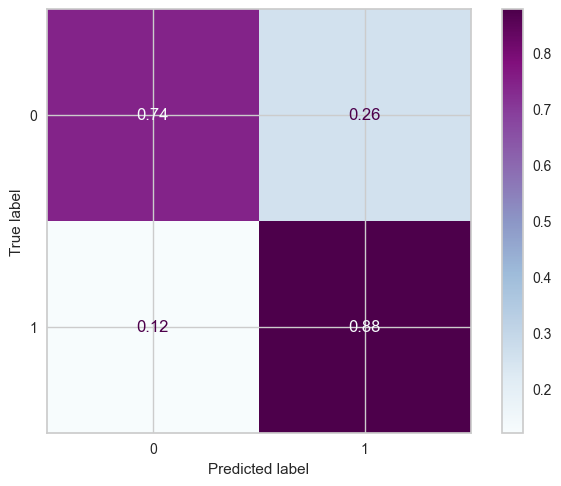

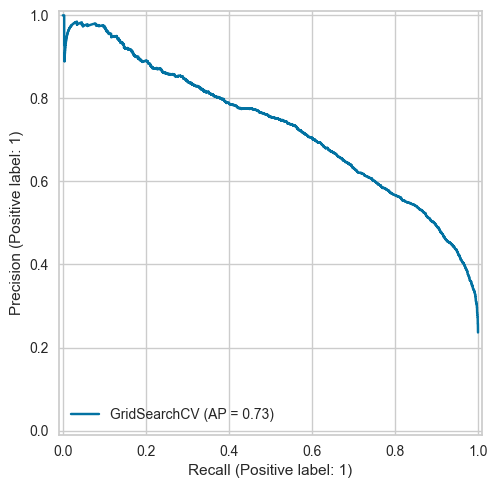

In [1011]:
# Roc_AUC_score
print('log_grid_model ROC_AUC Score:', roc_auc_score(Y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')


# Confusion Matrix
grid_log_matrix = ConfusionMatrixDisplay.from_estimator(grid_model, X_test, Y_test, normalize='true', cmap='BuPu')

# Precision-Recall Curve
grid_log_prCurve = PrecisionRecallDisplay.from_estimator(grid_model, X_test, Y_test)

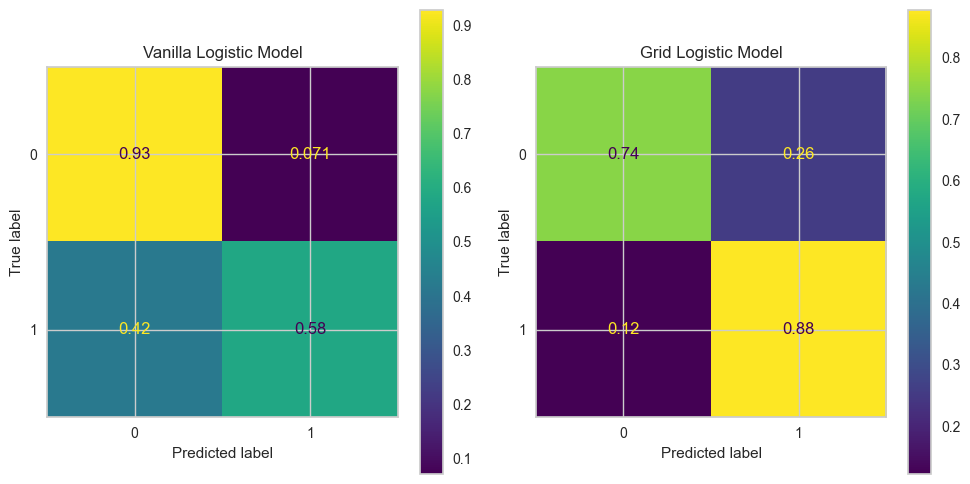

In [1012]:
#Comparing Vanilla and Grid Logistic Model
# Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10,5))

log_matrix.plot(ax=ax[0])
ax[0].set_title("Vanilla Logistic Model")
grid_log_matrix.plot(ax=ax[1])
ax[1].set_title("Grid Logistic Model")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Grid Model - Precision Recall Curve')

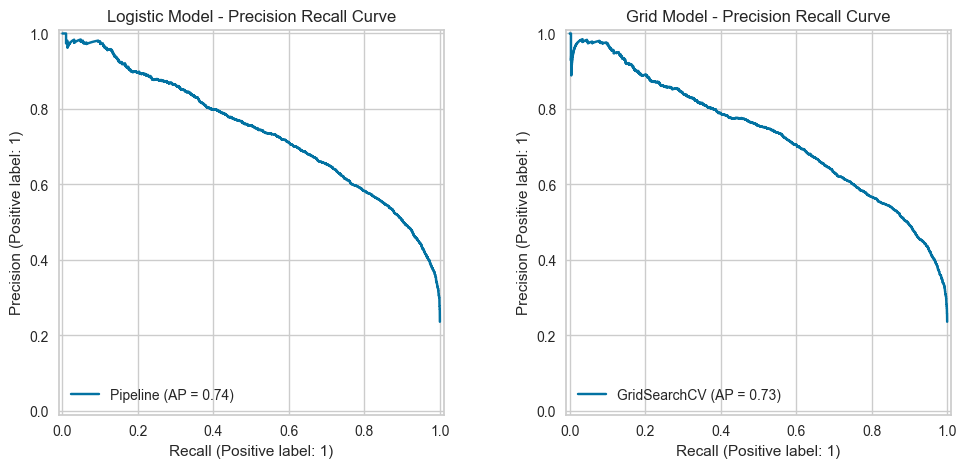

In [1013]:
#Precision-Recall Curves

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

log_prCurve.plot(ax=ax[0])
ax[0].set_title("Logistic Model - Precision Recall Curve")
grid_log_prCurve.plot(ax=ax[1])
ax[1].set_title("Grid Model - Precision Recall Curve")

### K-Nearest Neighbours (KNN)


In [1014]:
knn_model = Pipeline([("scaler", MinMaxScaler()),("knn", KNeighborsClassifier())])

knn_model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [1015]:
# Prediction
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

# Scores to compare the models at the end.
knn_f1 = f1_score(Y_test, y_pred)
knn_recall = recall_score(Y_test, y_pred)
knn_auc = roc_auc_score(Y_test, y_pred)

In [1016]:
# Evaluating the Model Performance using Classification Metrics

eval_metric(knn_model, X_train, Y_train, X_test, Y_test, 'knn_model')

knn_model Test_Set
[[11222  1208]
 [ 1609  2237]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     12430
           1       0.65      0.58      0.61      3846

    accuracy                           0.83     16276
   macro avg       0.76      0.74      0.75     16276
weighted avg       0.82      0.83      0.82     16276


knn_model Train_Set
[[23135  1563]
 [ 2420  5419]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     24698
           1       0.78      0.69      0.73      7839

    accuracy                           0.88     32537
   macro avg       0.84      0.81      0.83     32537
weighted avg       0.87      0.88      0.88     32537



knn_model ROC_AUC Score: 0.8430205929073848
--------------------------------------------------


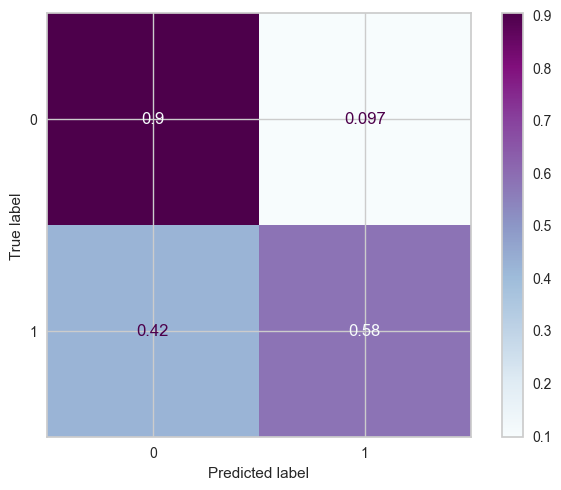

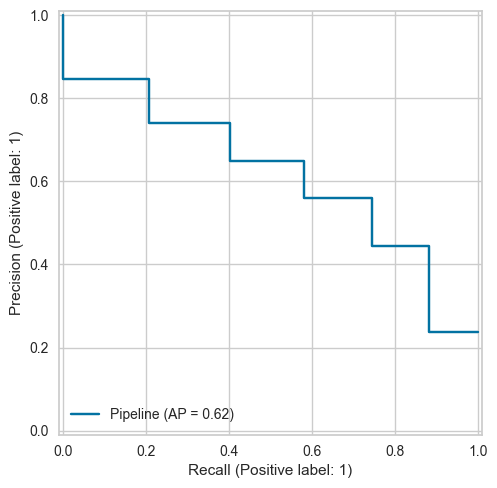

In [1017]:
# Roc_AUC_score
print('knn_model ROC_AUC Score:', roc_auc_score(Y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
knn_matrix = ConfusionMatrixDisplay.from_estimator(knn_model, X_test,Y_test, normalize='true', cmap='BuPu' )

# Precision-Recall Curve
knn_prCurve = PrecisionRecallDisplay.from_estimator(knn_model, X_test, Y_test)

In [1018]:
#Elbow Method for Choosing Reasonable K-Values

test_error_rates = []

for k in range(1,10):
    
    knn_model = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
    
    scores = cross_validate(knn_model, X_train, Y_train, scoring = ['recall'], cv = 10)
    
    recall_mean = scores["test_recall"].mean() 
    
    test_error = 1 - recall_mean
    
    test_error_rates.append(test_error)

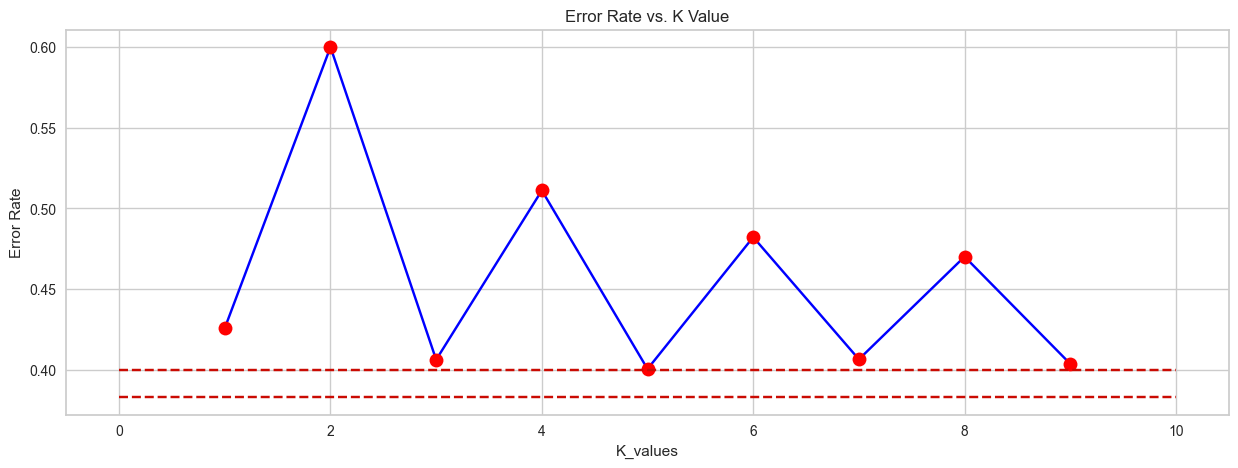

In [1019]:
# Error Rate vs. K Value

plt.figure(figsize=(15,5))
plt.plot(range(1,10), test_error_rates, color='blue', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.4, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.383, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

In [1020]:
#Overfiting and Underfiting Control for K-Values

test_error_rates = []
train_error_rates = []

for k in range(1,10):
    
    knn_model = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
    
    knn_model.fit(X_train,Y_train) 
    
    scores = cross_validate(knn_model, X_train, Y_train, scoring = ['recall'], cv = 10, return_train_score=True)
    
    recall_test_mean = scores["test_recall"].mean() 
    recall_train_mean = scores["train_recall"].mean() 

    
    test_error = 1 - recall_test_mean
    train_error = 1 - recall_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

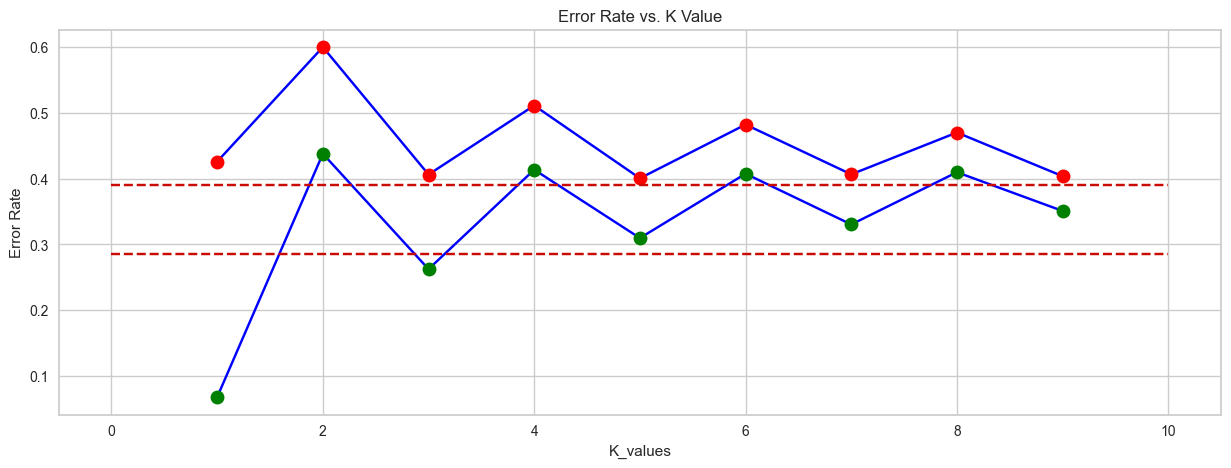

In [1021]:
plt.figure(figsize=(15,5))
plt.plot(range(1,10), test_error_rates, color='blue', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,10), train_error_rates, color='blue', marker='o',
         markerfacecolor='green', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.39, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.286, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

# Red color: Test data erorr rates
# Green color: Train data error rates

In [1022]:
#Scores by Various K-Values
k_list = [3,5,7,15]
 
for i in k_list:
    
    knn = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
    knn.fit(X_train, Y_train)
    
    print(f'WITH K={i}\n')
    
    eval_metric(knn, X_train, Y_train, X_test, Y_test,'knn_model')


WITH K=3

knn_model Test_Set
[[11323  1107]
 [ 1604  2242]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     12430
           1       0.67      0.58      0.62      3846

    accuracy                           0.83     16276
   macro avg       0.77      0.75      0.76     16276
weighted avg       0.83      0.83      0.83     16276


knn_model Train_Set
[[23006  1692]
 [ 2750  5089]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     24698
           1       0.75      0.65      0.70      7839

    accuracy                           0.86     32537
   macro avg       0.82      0.79      0.80     32537
weighted avg       0.86      0.86      0.86     32537

WITH K=5

knn_model Test_Set
[[11323  1107]
 [ 1604  2242]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     12430
           1       0.67      0.58      0.62      3846

    accura

In [1023]:
#Cross Validation For Optimal K Value
model = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))])

scores = cross_validate(model, X_train, Y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.838185
train_accuracy     0.872016
test_precision     0.686800
train_precision    0.764593
test_recall        0.604035
train_recall       0.677326
test_f1            0.642641
train_f1           0.718314
dtype: float64

In [1024]:
# Hyperparameters Tuning with GridSearchSV 

model = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])


k_values = range(1,10)

param_grid = {
        "knn__n_neighbors": k_values,
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
        }


knn_grid_model = GridSearchCV(model,
                              param_grid,
                              scoring='recall',
                              cv=5,
                              n_jobs= -1,
                              verbose=1,
                              return_train_score=True).fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [1025]:
print('Best Params:', knn_grid_model.best_params_)
print('Best Recall Score(test):', knn_grid_model.best_score_)
print('Best Score index:', knn_grid_model.best_index_)

Best Params: {'knn__metric': 'minkowski', 'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'uniform'}
Best Recall Score(test): 0.6053088737090241
Best Score index: 26


In [1026]:
# Checking overfiting with the CV scores

pd.DataFrame(knn_grid_model.cv_results_).loc[10, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.602501
mean_train_score    0.748405
Name: 10, dtype: object

In [1027]:
# Prediction
y_pred = knn_grid_model.predict(X_test)
y_pred_proba = knn_grid_model.predict_proba(X_test)

# Scores to compare the models at the end.
knn_grid_f1 = f1_score(Y_test, y_pred)
knn_grid_recall = recall_score(Y_test, y_pred)
knn_grid_auc = roc_auc_score(Y_test, y_pred)

In [1028]:
# Checking the Incorrect Predictions

# Test Data df
test_data = pd.concat([X_test, Y_test], axis=1)

# Create new column for 'predicted' classes to compore with actual target classes
test_data["pred"] = y_pred

# Filtering the wrong predicted obs
wrong_pred = test_data[((test_data["income"] == 0) & (test_data["pred"] == 1)) |
             ((test_data["income"] == 1) & (test_data["pred"] == 0))]

print('knn_grid_model Total Incorrect Predictions:', wrong_pred.shape)


print('------------------------------------------------')

# Actual-Predicted-Probalility of Pozitive Class(1)
my_dict = {"Actual": Y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(10)

knn_grid_model Total Incorrect Predictions: (2724, 49)
------------------------------------------------


Actual  Pred   Proba_1
11834       0     0  0.142857
2857        0     0  0.000000
1896        1     1  0.714286
11771       1     1  0.571429
992         1     1  1.000000
11294       0     0  0.000000
6653        0     0  0.142857
1505        0     1  0.714286
5001        0     0  0.000000
9343        1     1  0.571429

In [1029]:
# Evaluating the Model Performance using Classification Metrics

print('WITH K=7\n')
eval_metric(knn_grid_model, X_train, Y_train, X_test, Y_test,'knn_model')

WITH K=7

knn_model Test_Set
[[11264  1166]
 [ 1558  2288]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     12430
           1       0.66      0.59      0.63      3846

    accuracy                           0.83     16276
   macro avg       0.77      0.75      0.76     16276
weighted avg       0.83      0.83      0.83     16276


knn_model Train_Set
[[23058  1640]
 [ 2494  5345]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     24698
           1       0.77      0.68      0.72      7839

    accuracy                           0.87     32537
   macro avg       0.83      0.81      0.82     32537
weighted avg       0.87      0.87      0.87     32537



knn_grid_model ROC_AUC Score: 0.8627699621259186
--------------------------------------------------


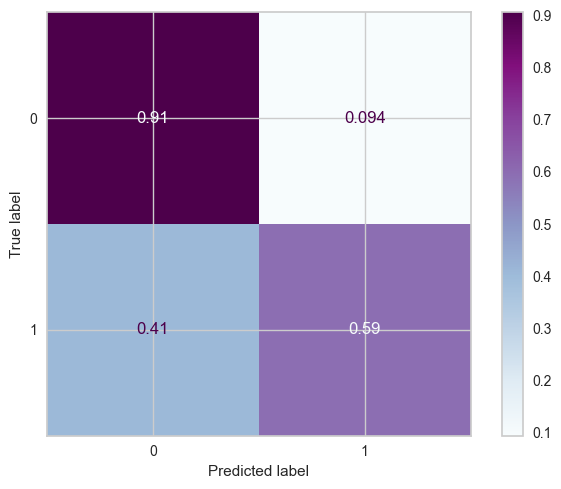

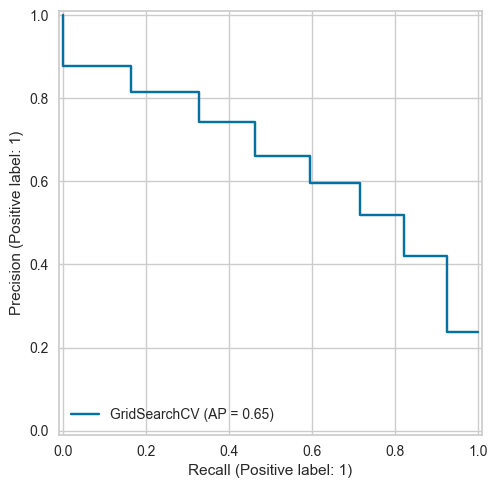

In [1030]:
# Roc_AUC_score
print('knn_grid_model ROC_AUC Score:', roc_auc_score(Y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
knn_grid_matrix = ConfusionMatrixDisplay.from_estimator(knn_grid_model, X_test,Y_test, normalize='true', cmap='BuPu' )

# Precision-Recall Curve
knn_grid_prCurve = PrecisionRecallDisplay.from_estimator(knn_grid_model, X_test, Y_test)

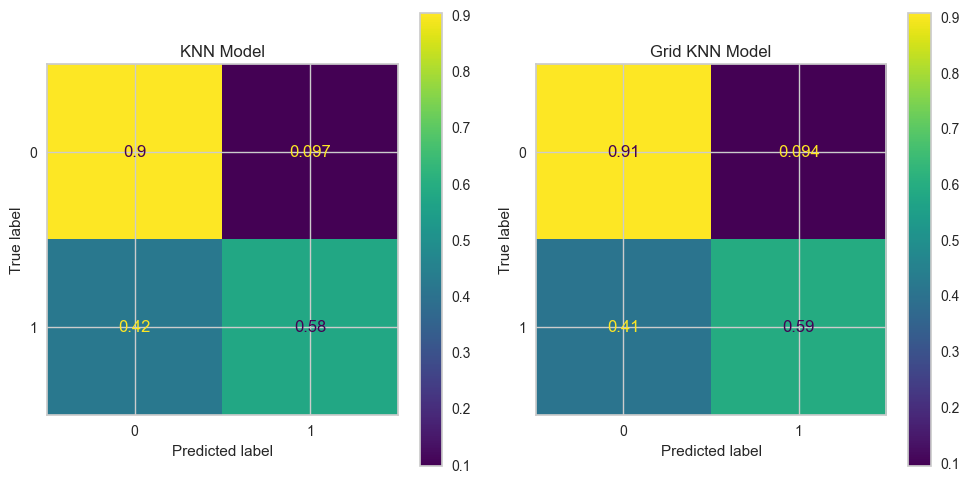

In [1031]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

knn_matrix.plot(ax=ax[0])
ax[0].set_title("KNN Model")
knn_grid_matrix.plot(ax=ax[1])
ax[1].set_title("Grid KNN Model")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'KNN Grid Model - Precision Recall Curve')

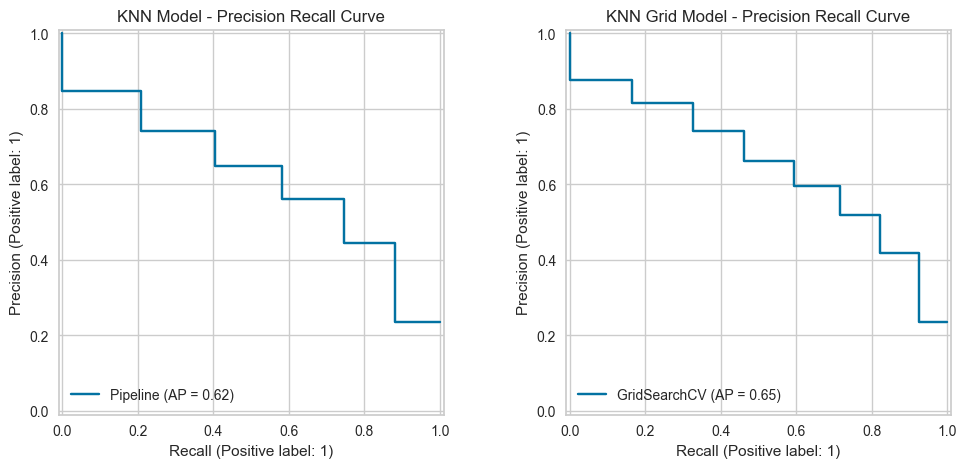

In [1032]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

knn_prCurve.plot(ax=ax[0])
ax[0].set_title("KNN Model - Precision Recall Curve")
knn_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("KNN Grid Model - Precision Recall Curve")

### Comparing the Models - Logistic and KNN

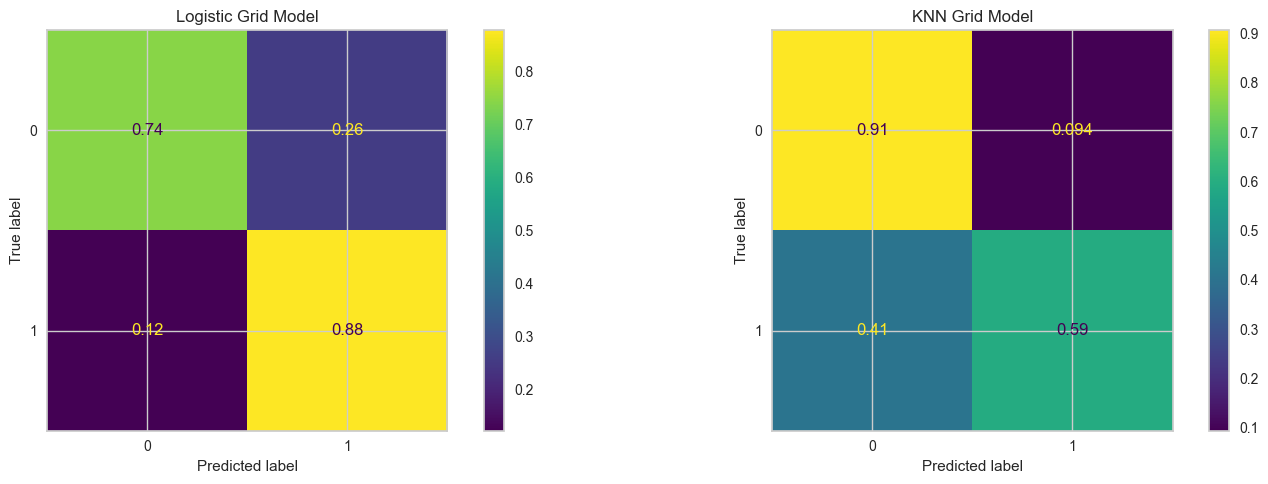

In [1033]:
# Confusion Matrix 
fig, ax = plt.subplots(1, 2, figsize=(15,5))

grid_log_matrix.plot(ax=ax[0])
ax[0].set_title("Logistic Grid Model")
knn_grid_matrix.plot(ax=ax[1])
ax[1].set_title("KNN Grid Model")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'KNN Grid -Precision Recall Curve')

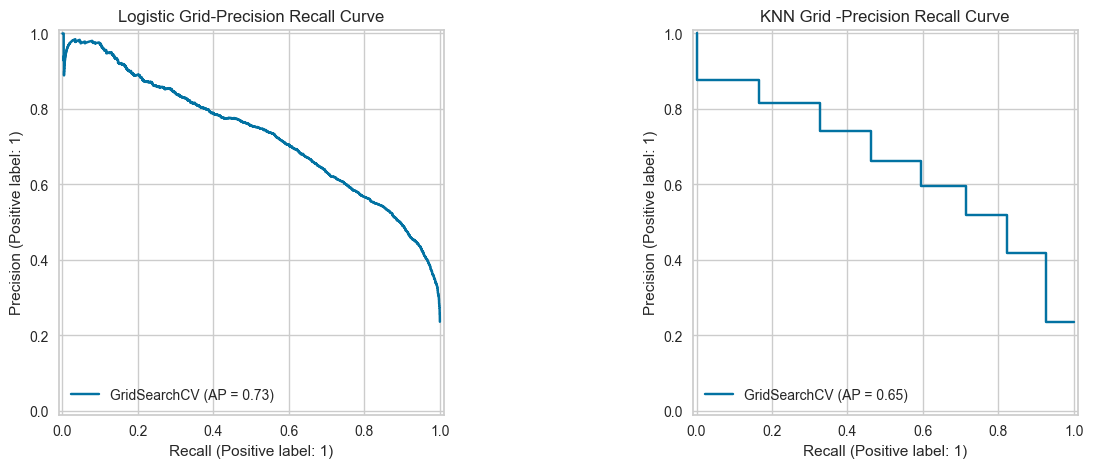

In [1034]:
# Precision-Recall Curves

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

grid_log_prCurve.plot(ax=ax[0])
ax[0].set_title("Logistic Grid-Precision Recall Curve")

knn_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("KNN Grid -Precision Recall Curve")

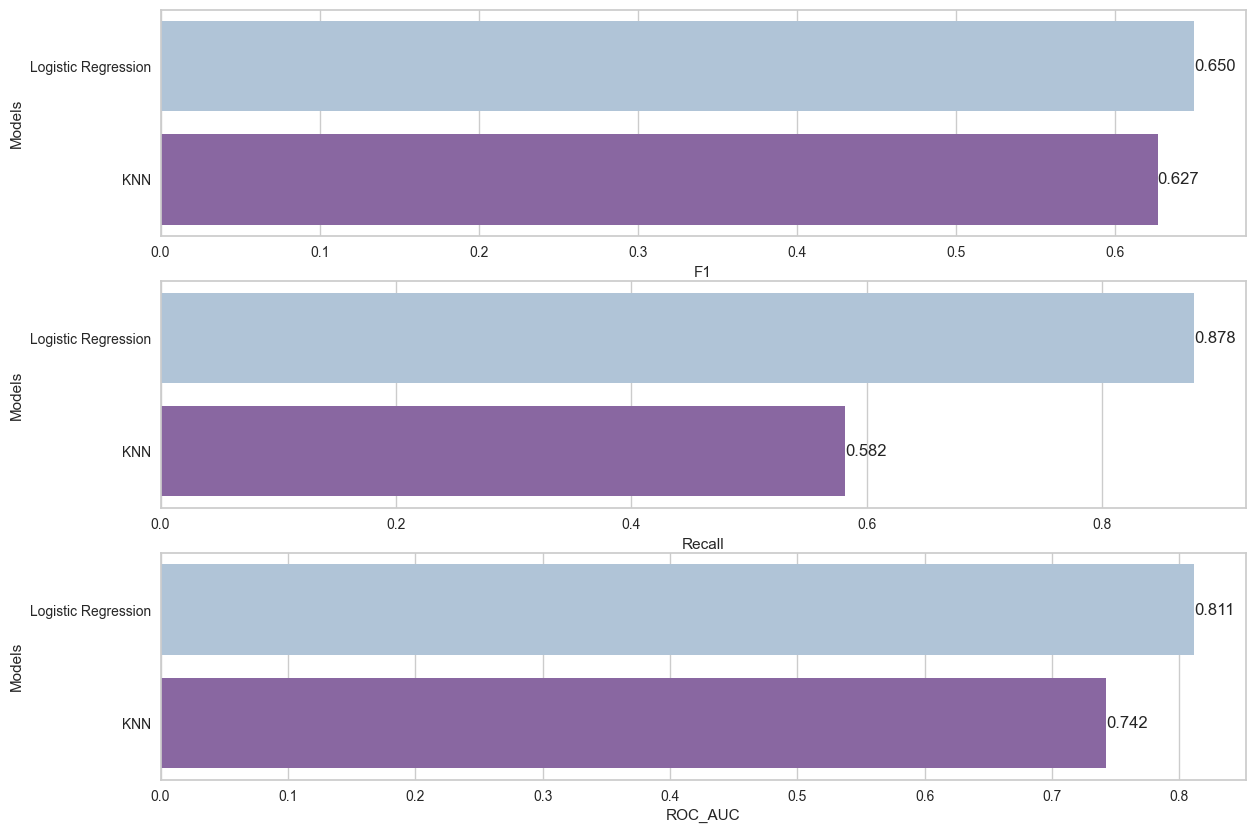

In [1035]:
# F1 - Recall - ROC_AUC Scores

compare = pd.DataFrame({"Models": ["Logistic Regression", "KNN"],
                        "F1": [log_grid_f1, knn_grid_f1],
                        "Recall": [log_grid_recall, knn_recall],
                        "ROC_AUC": [log_grid_auc, knn_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
     
    
plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Models", data=compare, palette="BuPu")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Models", data=compare, palette="BuPu")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Models", data=compare, palette="BuPu")
labels(ax)

plt.show()
